# work flow on ZTF Ia-cms objects

### import packages

In [1]:
import sys
sys.path.append('../sdapy')
from ztfanalysis import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.cosmology import Planck13 as cosmo
from filters import *

### ZTF names for the project

        ZTF18aaykjei & SN 2018crl & 0.097 & -19.66 & 39.96 & SDSS J161938.90+491104.5 & 18.926 & Edge-on \\% & Yao 2018, from host lines z=0.0972 \\
        ZTF18abuatfp & SN 2018gkx & 0.1366 & -20.07 & 109.36 & SDSS J135219.22+553830.2 & 18.256 & Irregular\\% & N/A, from host lines z=0.1378 \\
        ZTF18actuhrs & SN 2018evt & 0.02378 & -19.10 & 178.15 & MCG-01-35-011 & 14.199 & Spiral\\% & ATel 12325, from host 3 different catalog redshifts \\
        ZTF19aaeoqst & SN 2019agi & 0.0594 & -18.76 & 60.07 & SDSS J162244.06+240113.4 & 17.962 & Edge-on \\% & ATel 12559, from host nothing \\
        ZTF19abidbqp & SN 2019ibk & 0.04016 & $<$-17.55 & $>$112.33 & SDSS J014611.93-161701.1 & 15.594 & Spiral\\% & N/A, from host catalog value \\
        ZTF19acbjddp & SN 2019rvb & 0.1835 & -20.74 & 35.64 & WISEA J163809.90+682746.3 & 20.517 & Irregular\\% & N/A, from host lines difficult \\
        ZTF20abmlxrx & SN 2020onv & 0.095 & $<$-20.36 & $>$74.09 & WISEA J231646.31-231839.9 & 17.997 & Edge-on\\% & N/A, from host lines difficult but 0.094? \\
        ZTF20abqkbfx & SN 2020qxz & 0.0964 & -20.00 & 50.95 & WISEA J180400.99+740050.0 & 17.750 & Irregular\\% & N/A, from host lines difficult \\
        ZTF20accmutv & SN 2020uem & 0.041 & $<$-20.17 & $>$119.92 & WISEA J082423.32-032918.6 & 15.990 & Spiral\\% & ATel also paper, from host lines difficult \\
        ZTF20aciwcuz & SN 2020xtg & 0.0612 & -19.60 & 97.57 & SDSS J153317.64+450022.8 & 14.760 & Merging\\% & -, from catalog \\
        ZTF20acqikeh & SN 2020abfe & 0.093 & -20.24 & 94.06 & SDSS J200003.30+100904.2 & 20.766 & unclear\\% & N/A, 0.93 from host lines, noisy spec so can't be more precise \\
        ZTF21aaabwzx & SN 2020aekp & 0.046 & -19.62 & 35.16 & SDSS J154311.45+174843.7 & 18.483 & Irregular\\% & ATel, from host lines difficult \\

In [2]:
snlist = ['ZTF18acpeekw', 'ZTF18acbwxcc', 'ZTF18acaimrb',
          'ZTF18abklarx', 'ZTF20aazkjfv', 'ZTF21aafnunh',
          'ZTF18acqphpd', 'ZTF18aczqzrj', 'ZTF19aawqcgy',
          'ZTF19aaxfcpq', 'ZTF19ablesob', 'ZTF19abzwaen',
          'ZTF20abswdbg', 'ZTF20aapcbmc', 'ZTF20abbplei',
          'ZTF20abzoeiw', 'ZTF21aadatfg', 'ZTF21aagtpro',
          'ZTF21abmjgwf', 'ZTF21acbnfos']

In [3]:
velocities = {
    # SN SN_phase temp_phase vph vph_err
    'ZTF18acpeekw': [7.8,   6,  22266.8, 8155.7],
    'ZTF18acbwxcc': [27.18, 10, 16684.9, 7854.7],
    'ZTF18acaimrb': [48.22, 50, 16754.5, 5613.0],
    'ZTF18abklarx': [5.13,  10, 24977.9, 4787.4],
    'ZTF20aazkjfv': [-0.54, 2,  12974.3, 5426.9],
    'ZTF21aafnunh': [0.98,  0,  30451.1, 9516.6],
    'ZTF18acqphpd': [84.5,  72, 7432.7,  5356.8],
    'ZTF18aczqzrj': [8.8,   8,  13676.5, 4576.4],
    'ZTF19aawqcgy': [-0.22, -6, 39701.4, 7506.1],
    'ZTF19aaxfcpq': [45.58, 46, 11572.4, 4813.3],
    'ZTF19ablesob': [-9.71, 0,  17541.1, 5967.4],
    'ZTF19abzwaen': [29.3,  30, 10143.7, 3825.9],
    'ZTF19adaiomg': [86.5,  12, 9073.3,  6241.7],
    'ZTF20abswdbg': [-1.0,  -2, 11996.0, 7304.4],
    'ZTF20aapcbmc': [-0.43, 0,  13078.1, 6074.3],
    'ZTF20abbplei': [-2.89, 0,  35224.1, 5650.7],
    'ZTF20abzoeiw': [53.17, 52, 13718.4, 5816.6],
    'ZTF21aadatfg': [3.18,  8,  13733.5, 3327.2],
    'ZTF21aagtpro': [-10.04,8,  19618.5, 4475.7],
    'ZTF21abmjgwf': [5.37,  6,  14703.8, 6599.8],
    'ZTF21acbnfos': [0.49,  8,  12763.5, 4607.4],
}

In [4]:
snlist = list(np.unique(snlist1 + snlist2))
len(snlist)

25

### fun ztfmultiple to parse meta from bts catalog

In [5]:
ztfpm = ztfmultiple(metafile='rcf_query.txt', 
                    datafile='%s_data.clf',
                    parfile='priors.txt',
                    datadir='/Users/yash0613/Desktop/singleobj_study/ztficbl/',
                    skiprows=[], )
ztfpm.parse_meta(syntax='ZTFID in %s'%snlist)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


meta 21 objs


### check if sn are missed by bts cat

In [6]:
for _ in snlist:
    if not _ in list(ztfpm.meta['ZTFID']): print (_)

ZTF18achdzwk
ZTF18acpeekw
ZTF19adaiomg
ZTF21aardvol


### manually add infos for the missing one

In [7]:
ztfpm.meta = ztfpm.meta.append({'ZTFID':'ZTF18acpeekw','IAUID': 'AT2018jex', 'RA': '11:54:13.876', 
                    'Dec':'20:44:2.525', 'type': 'SN Ic-BL','redshift': 0.087, 'A_V': 0.123}, ignore_index=True)
ztfpm.meta = ztfpm.meta.append({'ZTFID':'ZTF19adaiomg','IAUID': 'SN2019xcc', 'RA': '11:01:12.39', 
                    'Dec':'+16:43:29.1', 'type': 'SN Ic-BL','redshift': 0.0287, 'A_V': 0.052}, ignore_index=True)
ztfpm.meta = ztfpm.meta.append({'ZTFID':'ZTF18achdzwk','IAUID': 'SN2018ium', 'RA': '10:10:31.76', 
                    'Dec':'+10:02:39.2', 'type': 'SN Ic-BL','redshift': 0.03167, 'A_V': 0.119}, ignore_index=True)
ztfpm.meta = ztfpm.meta.append({'ZTFID':'ZTF21aardvol','IAUID': 'AT2021htb', 'RA': '07:45:31.19', 
                    'Dec':'46:40:01.39', 'type': 'SN Ic-BL','redshift': 0.032, 'A_V': 0.182}, ignore_index=True)
ztfpm.format_meta()

# for all objs

100%|██████████| 25/25 [00:04<00:00,  5.54it/s]


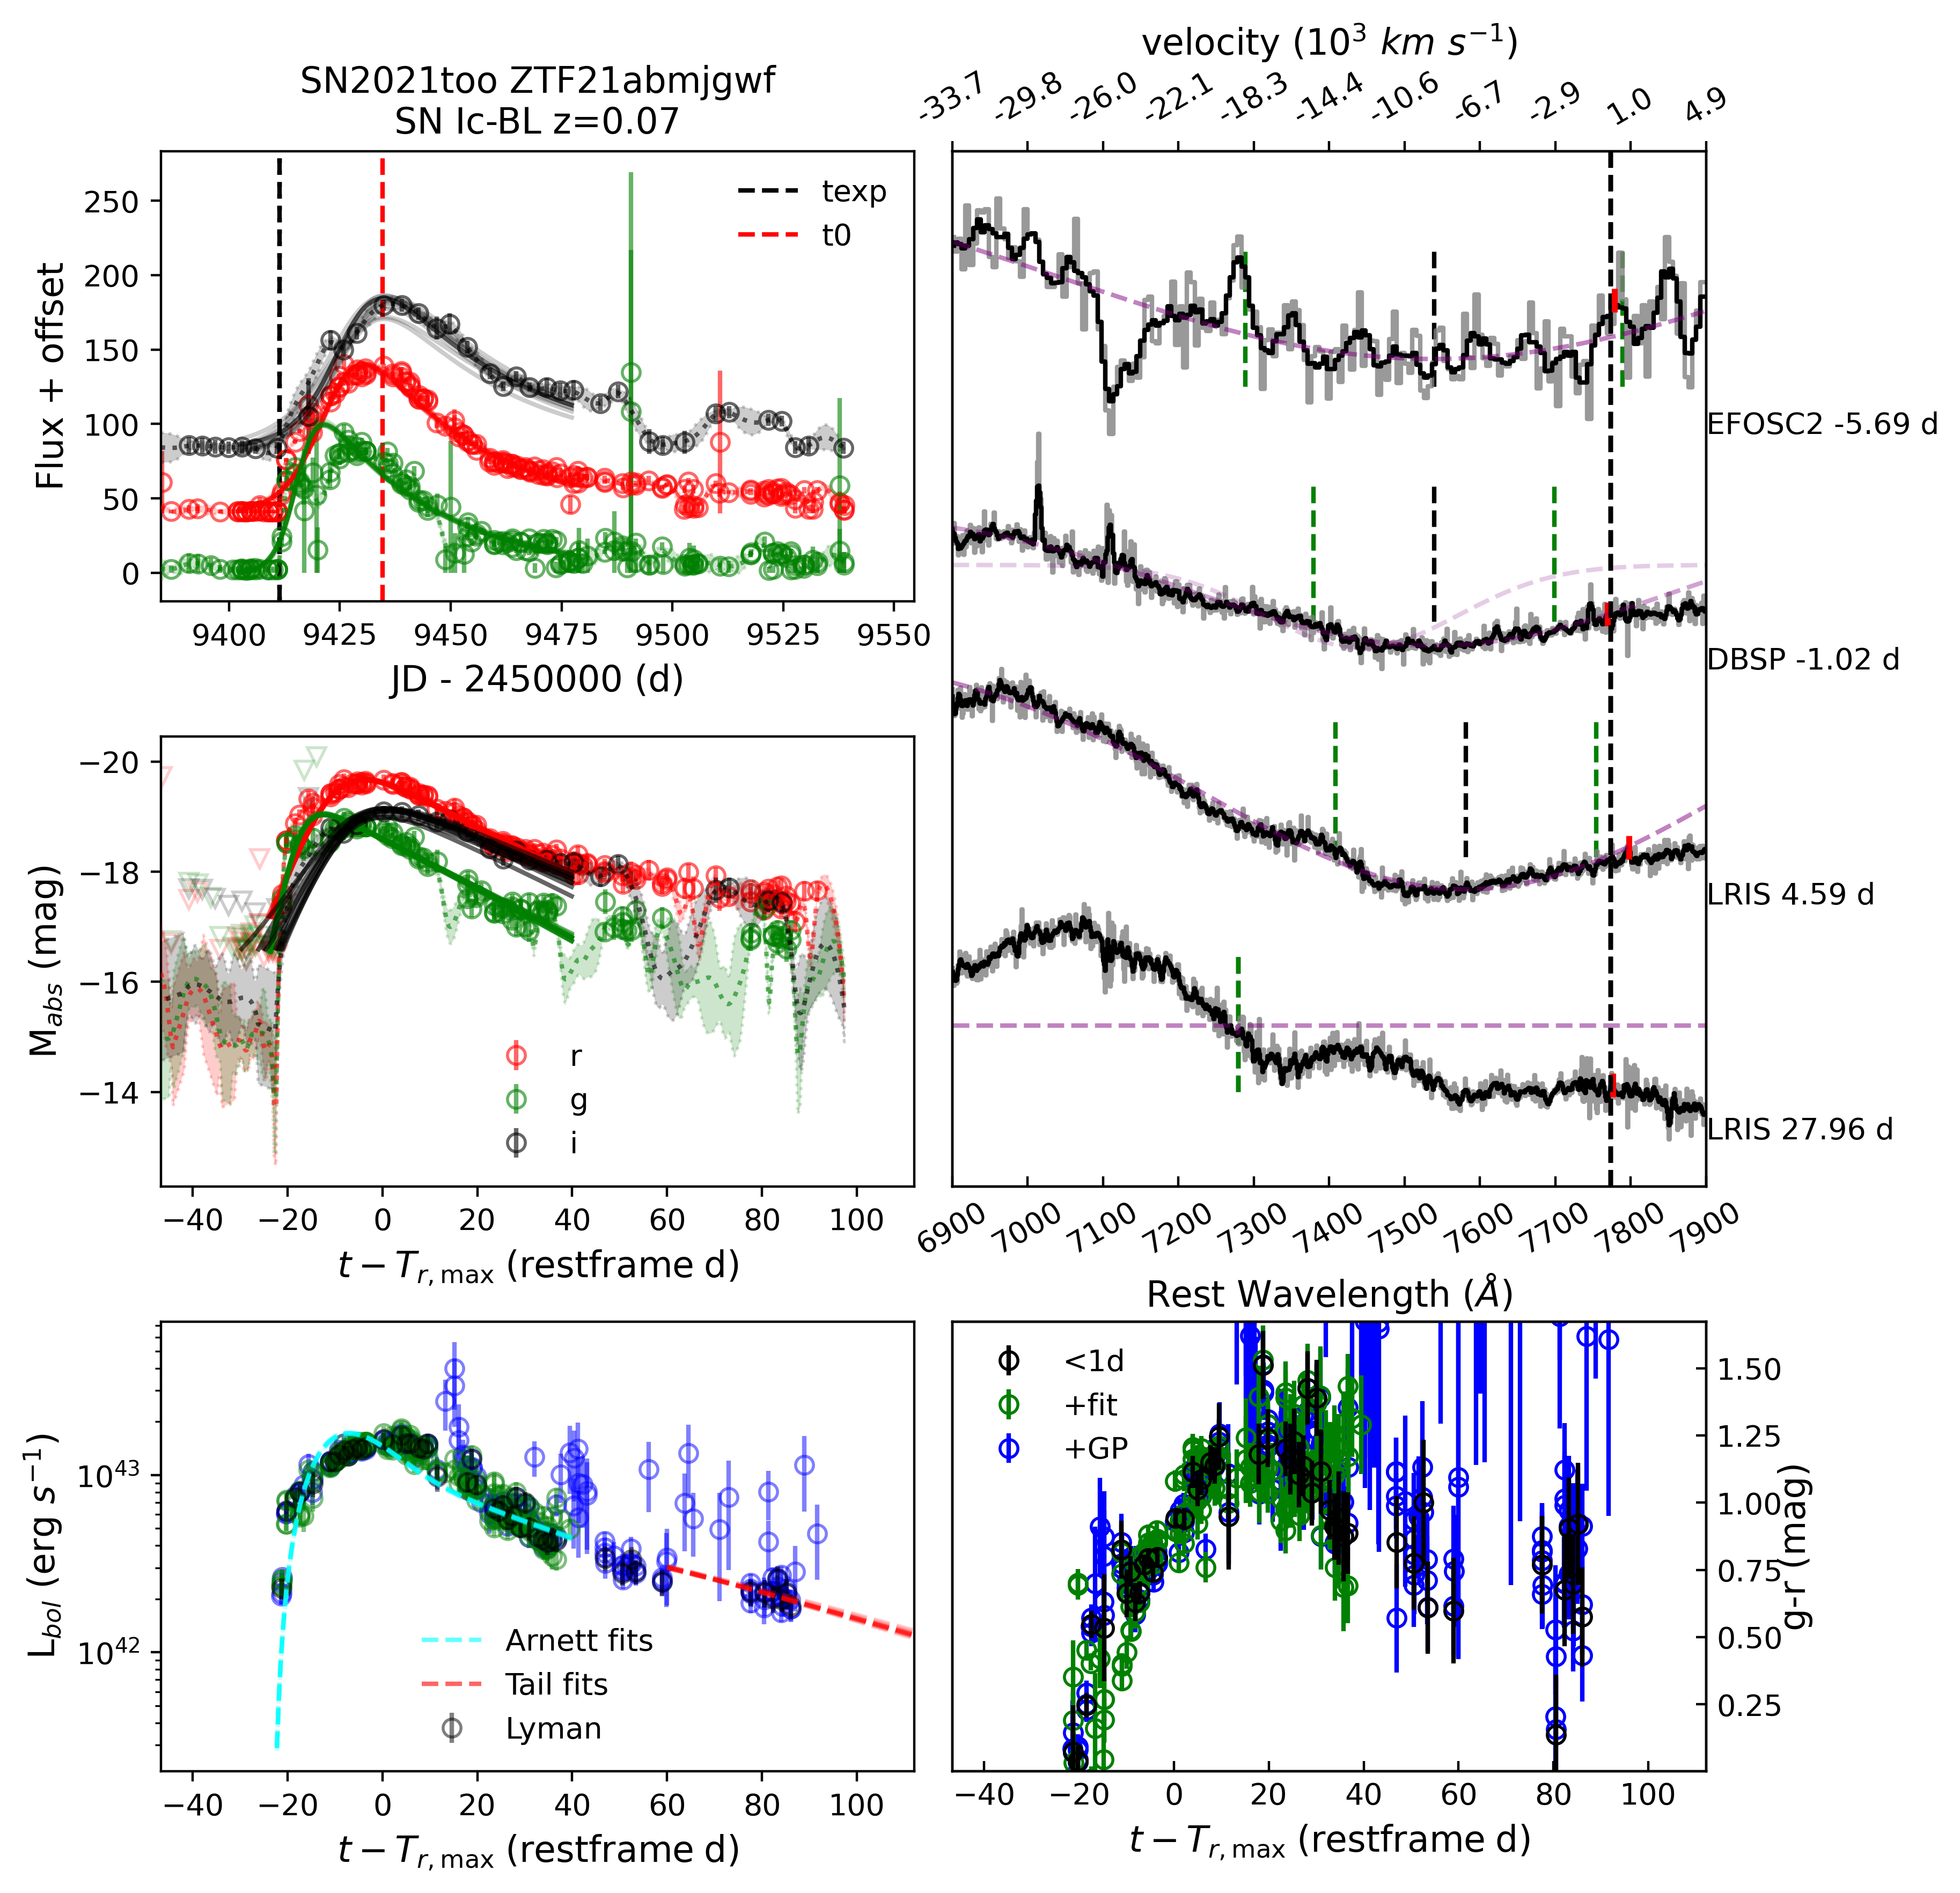

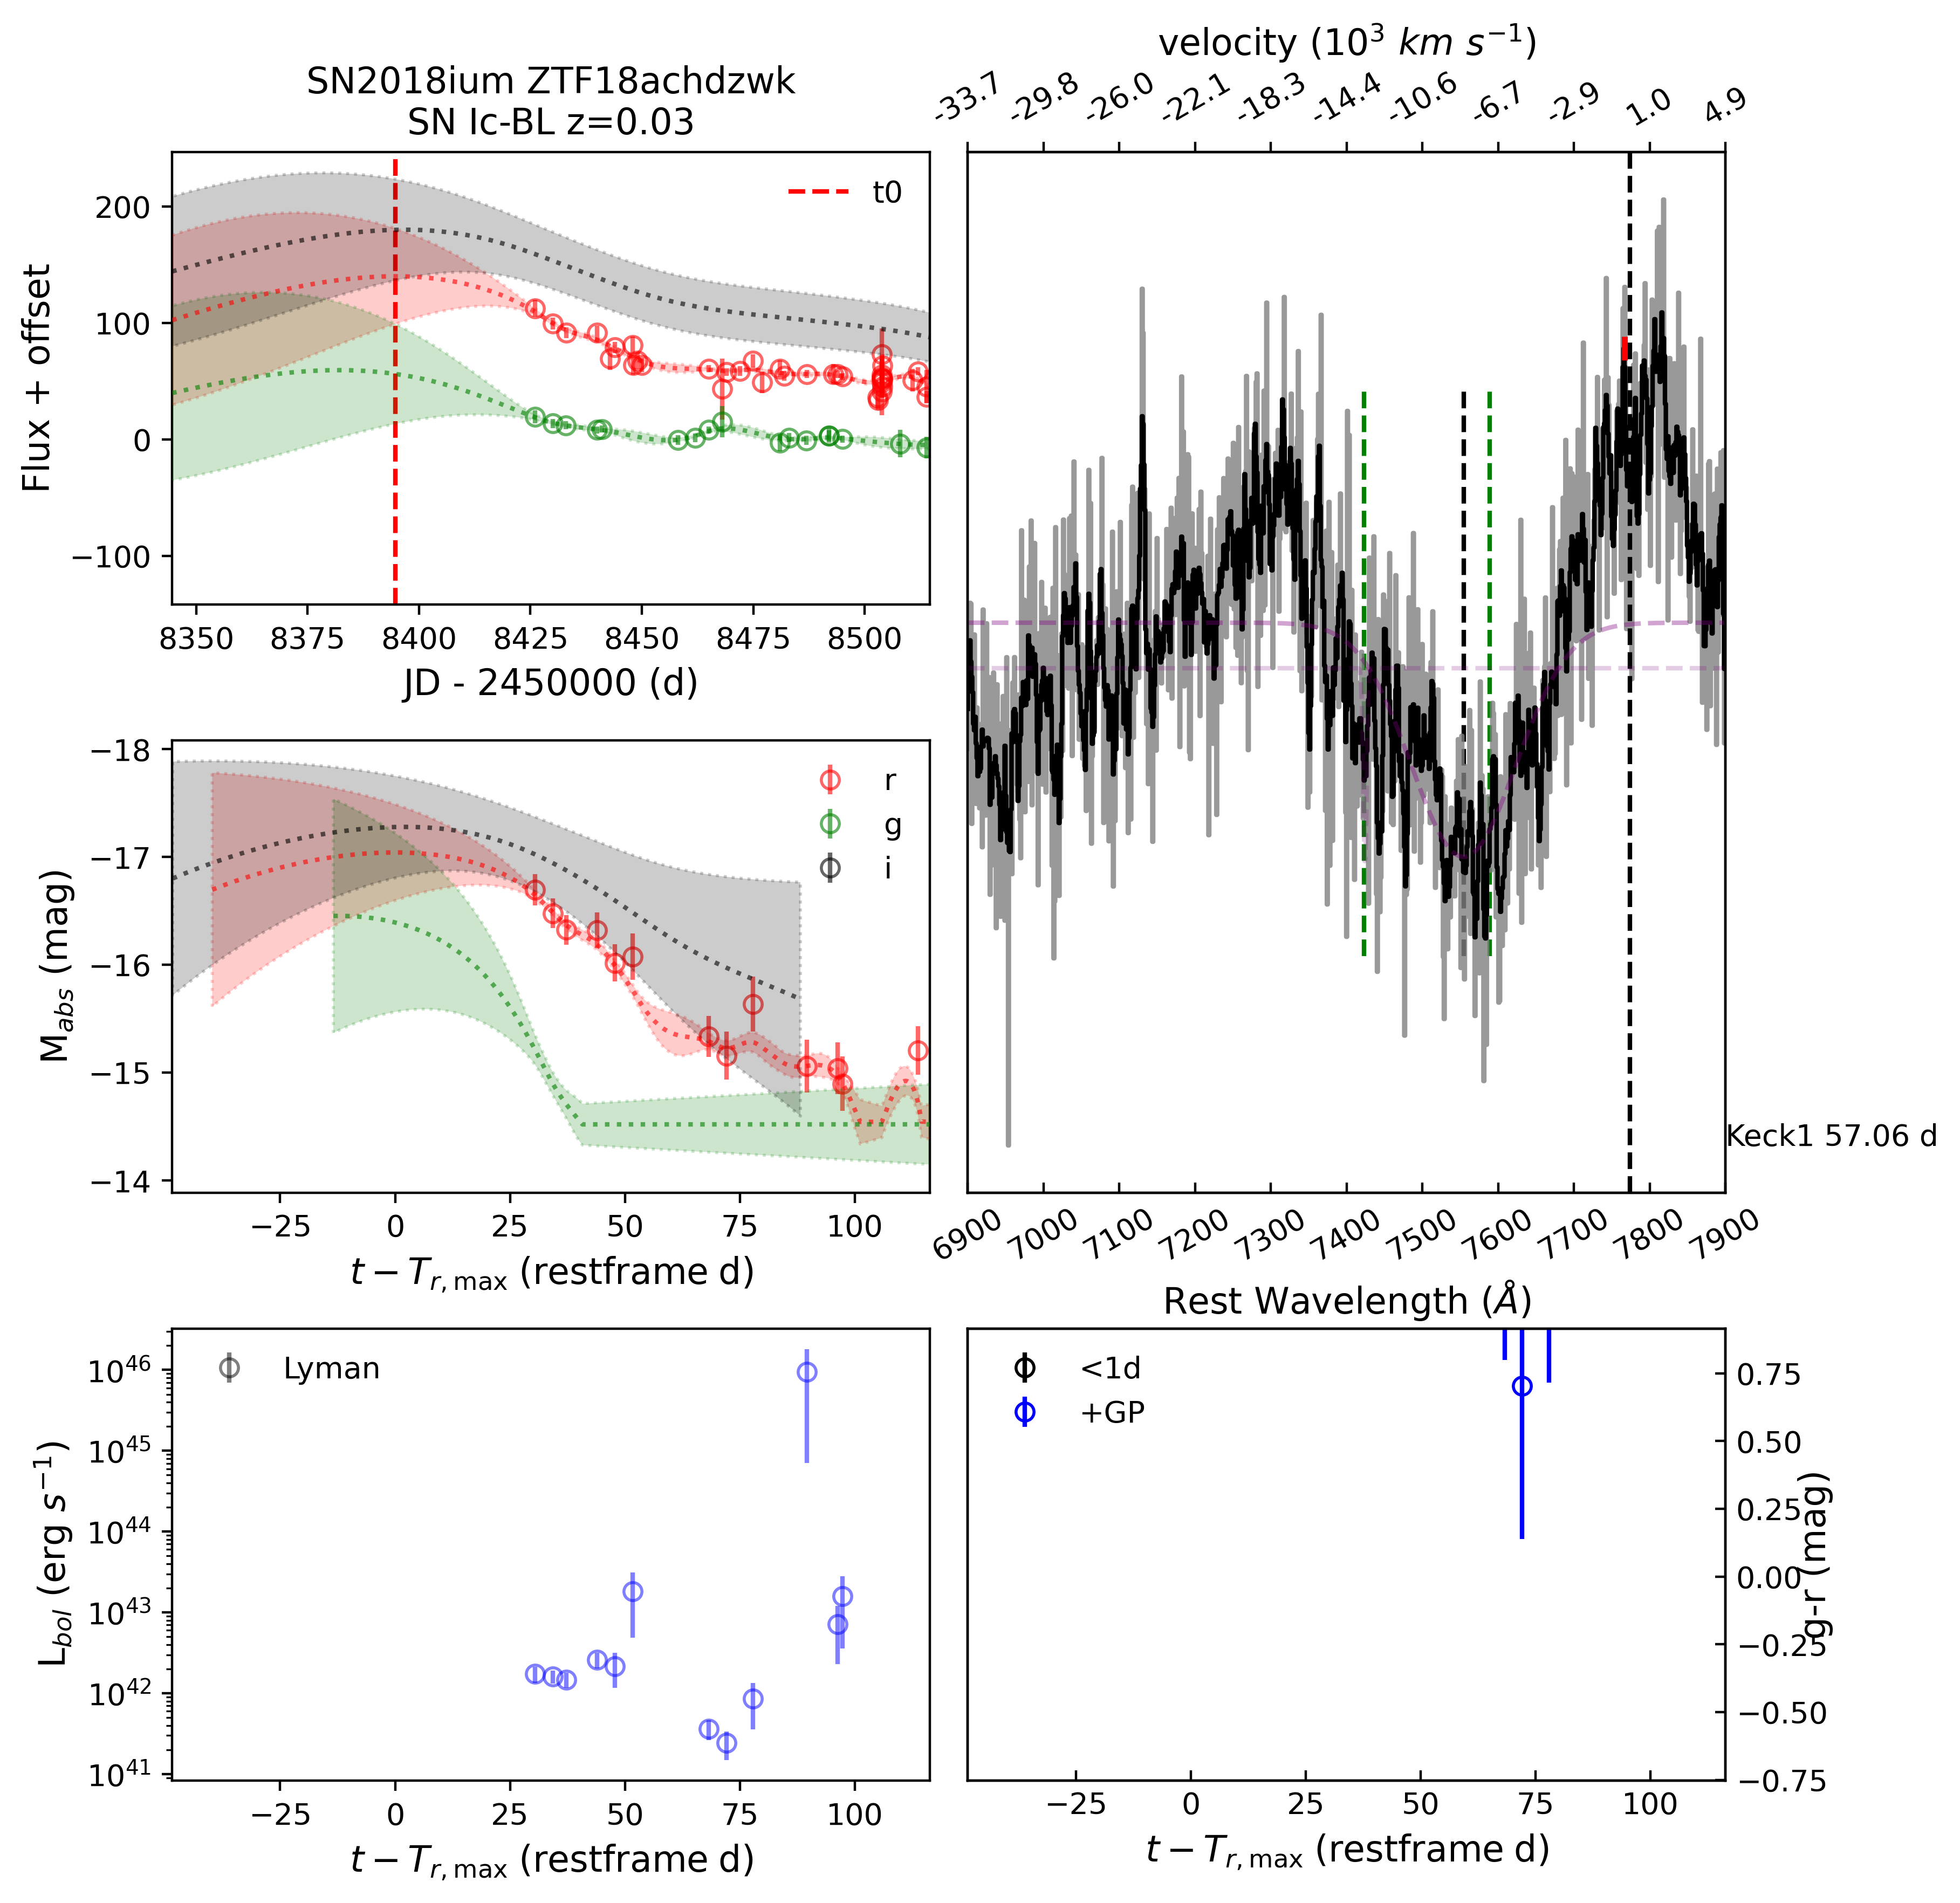

In [12]:
ztfpm.parse_params(force=True)
ztfpm.run(verbose=True, clobber=False, axes=None)

In [9]:
ztfpm.data

{'ZTF21aagtpro': <ztfanalysis.ztfsingle at 0x7f8739caf908>}

In [11]:
ztfpm.data['ZTF21aagtpro'].__dict__.keys()

dict_keys(['kwargs', 'ztfid', 'iauid', 'ra', 'dec', 'z', 'mkwebv', 'hostebv', 'sntype', 'dm', 't0', 'tpeak', 'fpeak', 'axes', 'fig', 'ax', 'ax1', 'ax2', 'ax3', 'ax4', 'lc', 'ndets', 'ncolors', 'peakphot', 'earlypoints', 'cw', 'region', 'gpcls', 'texp', 'fitcls', 'fit_theta', 'fit_rtheta', 'colors', 'lc_match', 'mbol', 'arnettcls', 'arnett_theta', 'arnett_rtheta', 'tailcls', 'tail_theta', 'tail_rtheta', 'spec', 'specls'])

In [71]:
import os
for nsn in range(25):
    ztfid = ztfpm.meta.index[nsn]
    t0 = ztfpm.data[ztfid].t0
    try: texp = ztfpm.data[ztfid].texp
    except: 
        print ( '!!!!', ztfid )
        continue
    if 'arnettcls' in ztfpm.data[ztfid].__dict__:
        art = ztfpm.data[ztfid].arnettcls.get_par()[1]
    else:
        art = [-99, -99]
    '''
    #ztfpm.data[ztfid].show()
    #figpath = '{}/{}'.format(ztfpm.data[ztfid].kwargs['datadir'], 
    #                     ztfpm.data[ztfid].kwargs['figpath']%ztfpm.data[ztfid].ztfid)
    #os.system ('cp %s ~/Desktop/' % figpath)
    
    print ('\subsection{%s}\n'%ztfid)
    if ztfid in velocities and art[0] != -99: 
        v,ve = velocities[ztfid][2], velocities[ztfid][3]
        me1 = ztfpm.data[ztfid].taum_to_EM(vpeak=velocities[ztfid][2]/1000., vpeake=None, vopt=2)
        me2 = ztfpm.data[ztfid].taum_to_EM(vpeak=(velocities[ztfid][2]-velocities[ztfid][3])/1000., vpeake=None, vopt=2)
        print ( '%s, JD = %.2f, trise = %.2f d, v = %.1f (%.1f) km/s, Mni = %.2f Msun, taum = %.2f d \n\nwith v: Mej = %.2f Msun, Ek = %.2f foe\n\nwith v-ve: Mej = %.2f Msun, Ek = %.2f foe' % ( ztfid, t0, texp[1], v, ve, art[0], art[1], me1[0], me1[1], me2[0], me2[1] ))
    else:
        print ( '%s, JD = %.2f, trise = %.2f d, v = None, Mni = %.2f Msun, taum = %.2f d' % ( ztfid, t0, texp[1], art[0], art[1]))
    print ( '\n\\begin{figure}[H]\n\centering\n\includegraphics[width=.5\\textwidth]{fits/%s.png}\n\caption{}\n\end{figure}'%ztfid )
    print ( '\n\n')
    '''

!!!! ZTF18achdzwk


In [54]:
nsn = 2
ztfid = ztfpm.meta.index[nsn]
t0 = ztfpm.data[ztfid].t0
texp = ztfpm.data[ztfid].texp
art = ztfpm.data[ztfid].arnettcls.get_par()[1]
me1 = ztfpm.data[ztfid].taum_to_EM(vpeak=velocities[ztfid][2]/1000., vpeake=None, vopt=2)
me2 = ztfpm.data[ztfid].taum_to_EM(vpeak=(velocities[ztfid][2]-velocities[ztfid][3])/1000., vpeake=None, vopt=2)

print ('\subsection{%s}\n'%ztfid)

print ( '%s, JD = %.2f, trise = %.2f d, v = %.1f (%.1f) km/s, Mni = %.2f Msun, taum = %.2f d \n\nwith v: Mej = %.2f Msun, Ek = %.2f foe\n\nwith v-ve: Mej = %.2f Msun, Ek = %.2f foe' % ( ztfid, t0, texp[1], velocities[ztfid][2], velocities[ztfid][3], art[0], art[1], me1[0], me1[1], me2[0], me2[1] ))

print ( '\n\\begin{figure}[H]\n\centering\n\includegraphics[width=.5\\textwidth]{fits/%s.png}\n\caption{}\n\end{figure}'%ztfid )
#ztfpm.data[ztfid].corner(which='arnett_tail', limit=0.3,figpath='tmp')
#ztfpm.data[ztfid].corner(which='tail', limit=0.,figpath='tmp')

#ztfpm.data[ztfid].show()

\subsection{ZTF21aafnunh}

ZTF21aafnunh, JD = 2459252.52, trise = -15.92 d, v = 30451.1 (9516.6) km/s, Mni = 0.52 Msun, taum = 11.56 d 

with v: Mej = 4.52 Msun, Ek = 25.01 foe

with v-ve: Mej = 3.11 Msun, Ek = 8.13 foe

\begin{figure}[H]
\centering
\includegraphics[width=.5\textwidth]{fits/ZTF21aafnunh.png}
\caption{}
\end{figure}


2450948.1899995958


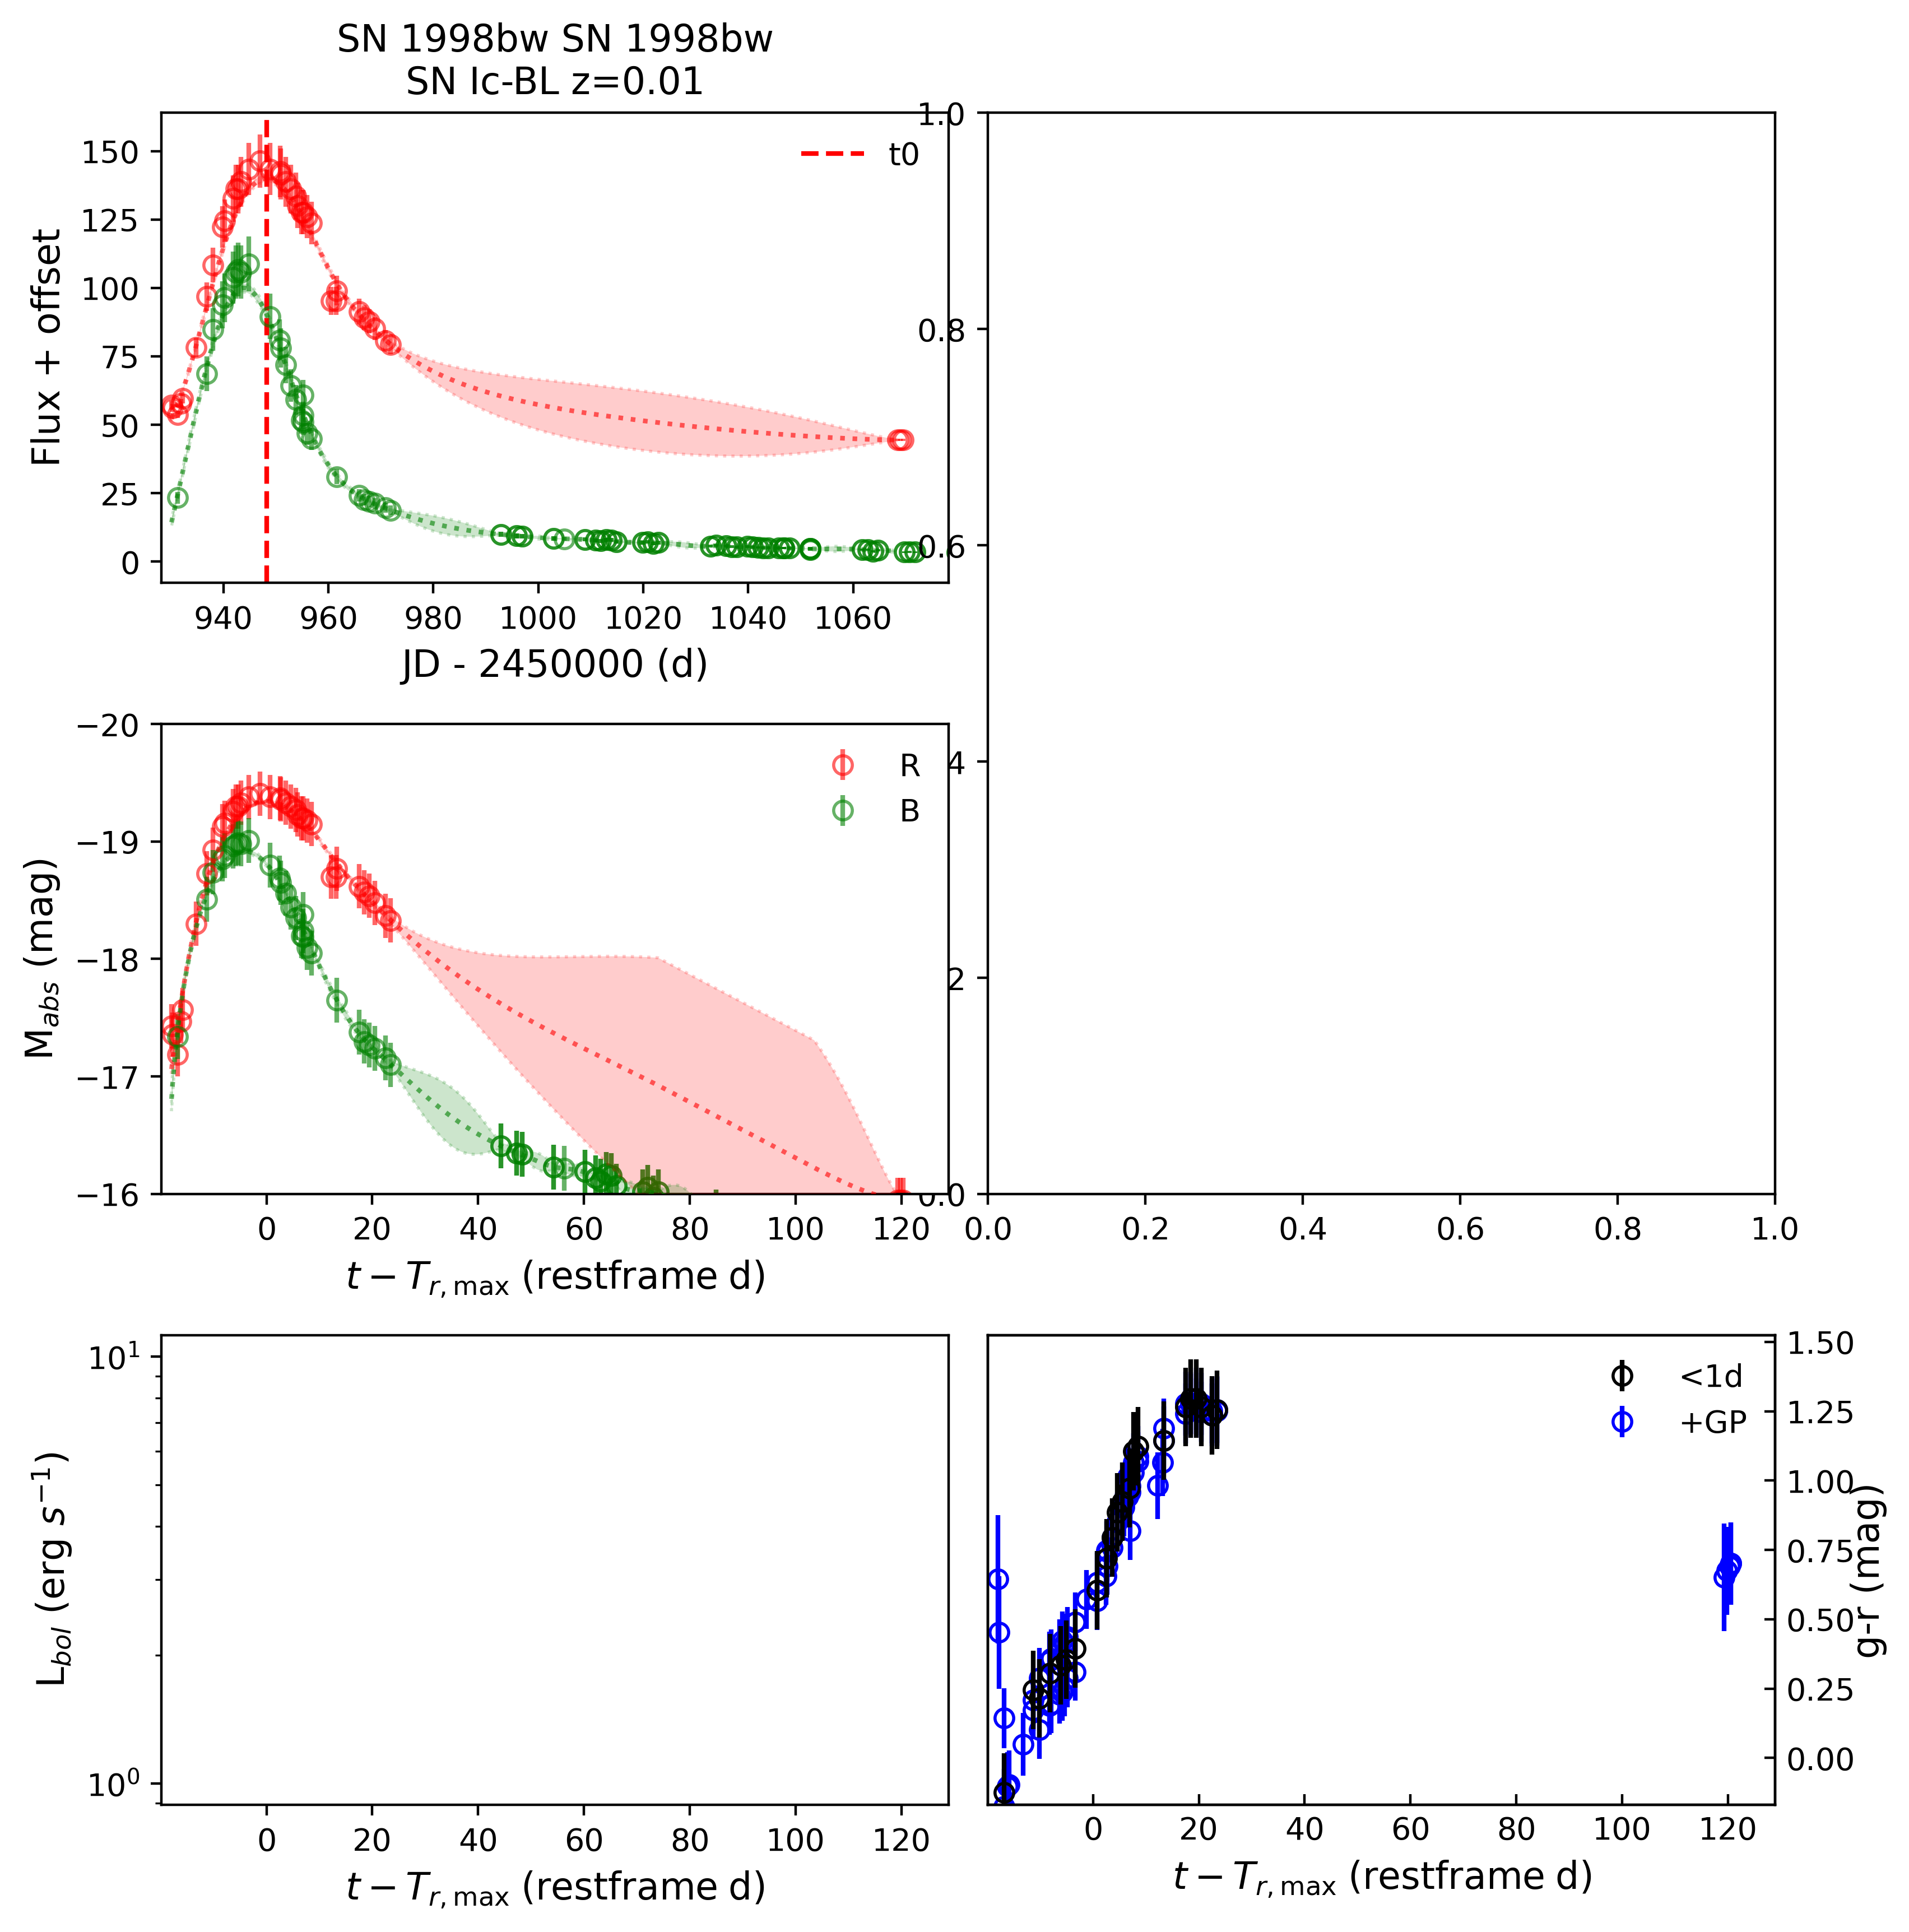

In [39]:
# parse 1998bw whose lc is taken from open sn catalog
sn1998bw_dist = cosmo.luminosity_distance( 0.0085 ).value
sn1998bw_dm = 5*np.log10(sn1998bw_dist)  + 25
sn1998bw_df = ztfsingle('SN 1998bw', iauid='SN 1998bw', z=0.0085,
                            mkwebv=0.0494, sntype='SN Ic-BL', dm=sn1998bw_dm, jdpeak=None,
                            axes=None,)    
sn1998bw_df.lc = pd.read_csv('/Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/1998bw.txt',sep = ',').drop_duplicates()
sn1998bw_df.lc.rename(columns={'magnitude':'mag',
                       'e_magnitude':'emag',
                       'band':'filter'}, inplace=True)
sn1998bw_df.lc['jdobs'] = sn1998bw_df.lc['time'] + 2400000.5
sn1998bw_df.lc['emag'] = np.zeros(len(sn1998bw_df.lc['mag'])) + .1
sn1998bw_df.lc = sn1998bw_df.lc.query('filter in ["R","B"]')
sn1998bw_df.add_flux()
sn1998bw_df.clip_lc()
sn1998bw_df.check_lc()
sn1998bw_df.run_gp()
sn1998bw_df.set_t0_withgp(filt='R')
print (sn1998bw_df.t0)
sn1998bw_df.calc_colors(cfilt1='B', cfilt2='R')
sn1998bw_df.init_fig()
sn1998bw_df.plot(plot_bands=['R','B'], ax_xlim=[-20,130], ax2_ylim=[-16,-20])

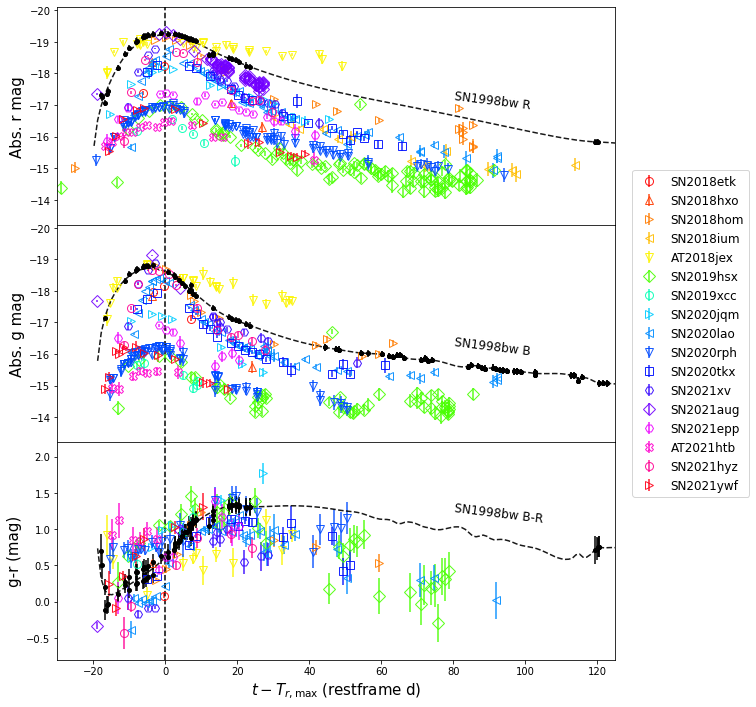

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
plt.subplots_adjust(wspace = 0, hspace = 0)
markerlist = ['o','^','>','<','v','s','H','D','h','H','X']

for i, ztfid in enumerate(sorted(ztfpm.data)):
    if ztfid not in snlist2: continue
    cc = plt.get_cmap('hsv')(float(i)/(len(ztfpm.data)-1))
    mm = markerlist[i%len(markerlist)]
    lc = ztfpm.data[ztfid].lc
    t0 = ztfpm.data[ztfid].t0
    z = ztfpm.data[ztfid].z
    dm = ztfpm.data[ztfid].dm
    iauid = ztfpm.data[ztfid].iauid
    _lc = lc.query('filter=="r" and mag<99')
    ax1.errorbar( (_lc['jdobs']-t0)/(1+z), _lc['mag']-dm, yerr=_lc['emag'], ls='',
                 marker=mm, markersize=8, fillstyle='none', color=cc, label='%s'%(iauid), alpha=.9)
    _lc = lc.query('filter=="g" and mag<99')
    ax2.errorbar( (_lc['jdobs']-t0)/(1+z), _lc['mag']-dm, yerr=_lc['emag'], ls='',
                 marker=mm, markersize=8, fillstyle='none', color=cc, label='%s'%(iauid), alpha=.9)
    if 'colors' in ztfpm.data[ztfid].__dict__:
        gmr = ztfpm.data[ztfid].colors
        jdc, mg, mr, emg, emr = gmr[1]
        ax3.errorbar( (jdc-t0)/(1+z), mg-mr, yerr=np.sqrt(emg**2+emr**2), ls='',
                 marker=mm, markersize=8, fillstyle='none', color=cc, label='%s'%(iauid), alpha=.9)

# points
t0 = sn1998bw_df.t0
z = sn1998bw_df.z
dm = sn1998bw_df.dm
_lc=sn1998bw_df.lc.query('filter=="R" and mag<99')
ax1.errorbar( (_lc['jdobs']-t0)/(1+z), _lc['mag']-dm, yerr=_lc['emag'], ls='',
                 marker='o', markersize=4, color='k')
_lc=sn1998bw_df.lc.query('filter=="B" and mag<99')
ax2.errorbar( (_lc['jdobs']-t0)/(1+z), _lc['mag']-dm, yerr=_lc['emag'], ls='',
                 marker='o', markersize=4, color='k')
gmr = sn1998bw_df.colors
jdc, mg, mr, emg, emr = gmr[3]
ax3.errorbar( (jdc-t0)/(1+z), mg-mr, yerr=np.sqrt(emg**2+emr**2), ls='',
                 marker='o', markersize=4, color='k')

# GP
sn1998bw_df.gpcls.predict(x_pred=np.arange(sn1998bw_df.t0-40, sn1998bw_df.t0+130), clobber=True)
__ = np.where(sn1998bw_df.gpcls.f_pred=='R')
xx = sn1998bw_df.gpcls.x_pred[__]
pp = (xx-sn1998bw_df.t0) / (1+sn1998bw_df.z)
yy = sn1998bw_df.gpcls.y_pred[__]
mm1 = sn1998bw_df.flux_to_mag(yy, dflux=None)
ax1.plot( pp, mm1-sn1998bw_df.dm, ls='--', marker='', color='k', alpha=.9)

__ = np.where(sn1998bw_df.gpcls.f_pred=='B')
xx = sn1998bw_df.gpcls.x_pred[__]
pp = (xx-sn1998bw_df.t0) / (1+sn1998bw_df.z)
yy = sn1998bw_df.gpcls.y_pred[__]
mm2 = sn1998bw_df.flux_to_mag(yy, dflux=None)
ax2.plot( pp, mm2-sn1998bw_df.dm, ls='--', marker='', color='k', alpha=.9)

ax3.plot( pp, mm2-mm1, ls='--', marker='', color='k', alpha=.9)

for ax in [ax1,ax2,ax3]: 
    ax.set_xlim([-30,125])
    ax.axvline(0,color='k',ls='--')
for ax in [ax1,ax2]: ax.set_ylim([-13.21,-20.1])
ax3.set_ylim([-.8,2.2])

ax1.text(80,-16.9,'SN1998bw R', fontsize=12, rotation=-7)
ax2.text(80,-16.0,'SN1998bw B', fontsize=12, rotation=-7)
ax3.text(80,1.1,'SN1998bw B-R', fontsize=12, rotation=-7)

ax1.set_xticks([])
ax2.set_xticks([])

ax1.legend(loc = 'center right', bbox_to_anchor = (1.25, -0.5), 
           ncol=1, numpoints=1, fontsize=12, frameon=True)
ax3.set_xlabel('$t - T_{r,\mathrm{max}} \; (\mathrm{restframe \; d})$',fontsize=15)
ax1.set_ylabel('Abs. r mag',fontsize=15)
ax2.set_ylabel('Abs. g mag',fontsize=15)
ax3.set_ylabel('g-r (mag)',fontsize=15)

fig.set_size_inches(10,12)
plt.show()
fig.savefig('/Users/yash0613/Desktop/scripts/sn_data_analysis/lcs_mag.png', bbox_inches='tight')

# start with one object
### test with ZTF21abmjgwf for example, get parameter that was needed, i.e. z, ebv and distance module

In [6]:
ztfid = 'ZTF21abmjgwf'
print (ztfpm.meta['redshift'][ztfid], ztfpm.meta['dm'][ztfid], 
       ztfpm.meta['ebv'][ztfid], ztfpm.meta['peakt'][ztfid] + 2458000, )

0.07 37.56538692164344 0.055161290322580644 2459430.84


### OK, now start a ztfsingle class with z, ebv and dm

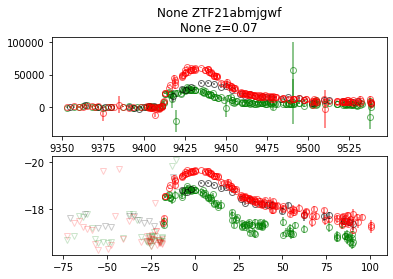

In [7]:
# initialize class
ztfp = ztfsingle(ztfid=ztfid, z=ztfpm.meta['redshift'][ztfid], 
                 dm=ztfpm.meta['dm'][ztfid], mkwebv=ztfpm.meta['ebv'][ztfid],
                 jdpeak=ztfpm.meta['peakt'][ztfid] + 2458000)

# get forced lightcurves
ztfp.get_local_forced_lightcurves()

# calculate Fmcmc and Fmcmc_unc from mags
ztfp.add_flux()

# check lc infos
#ztfp.check_lc(verbose=True, jdthre=1, plot_bands=['g','r','i'])

# create 2 plots
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2

# show
ztfp.plot(plot_bands=['g','r','i'])

### run gaussian process intepolation, to decide t0 as r band peak jd

t0 =  2459430.84
after GP, t0 =  2459434.5964453984


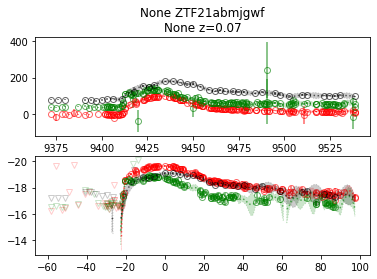

In [8]:
ztfp.run_gp(gp_type=1, 
            gp_routine='mcmc', 
            gp_mean='bazin', 
            kernel='matern32', 
            fix_scale=True,
            gp_fitr=[-60, 120], 
            gp_plotr=[-30, 120], 
            gp_bands=['g','r','i']
           )
print ('t0 = ',ztfp.t0)

ztfp.set_t0_withgp(filt='r') # set t0 with GP in r band
print ('after GP, t0 = ',ztfp.t0)

fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2

ztfp.plot(plot_bands=['r', 'g', 'i'])

### fits sn lc in g, r, and i to Bazin et al 2009, with emcee

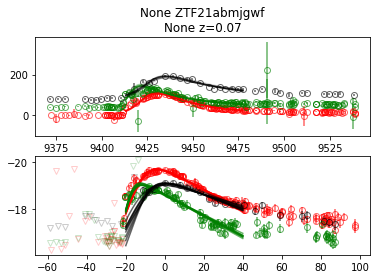

In [9]:
ztfp.run_fit(fit_type=1, 
            fit_routine='mcmc', 
            fit_bands=['i','g','r'],
            fit_mean='bazin', 
            fit_fitr=[-50, 50], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            nsteps_burnin=2000,
            verbose=False
           )
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.plot(gp_type=3, plot_bands=['r', 'g', 'i'])

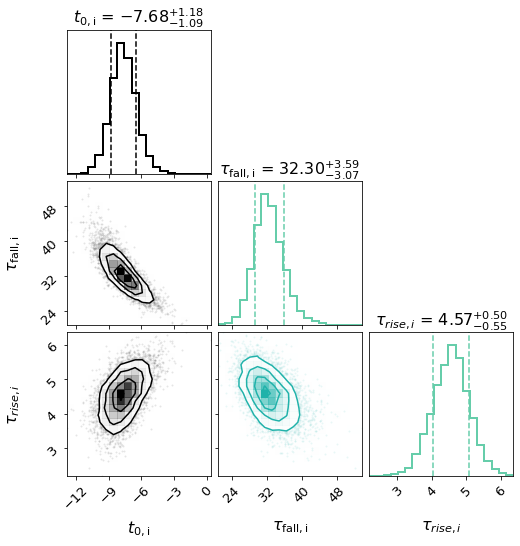

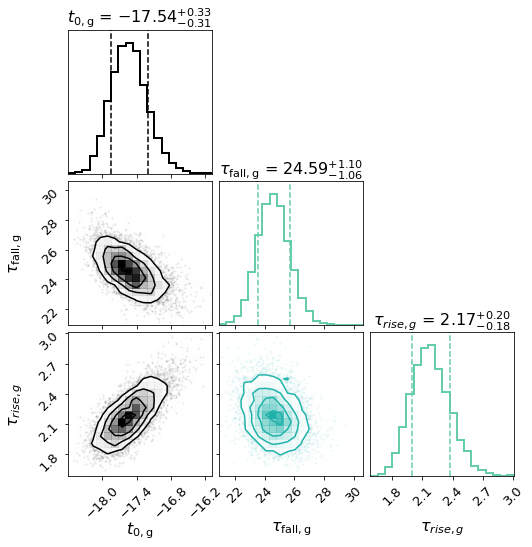

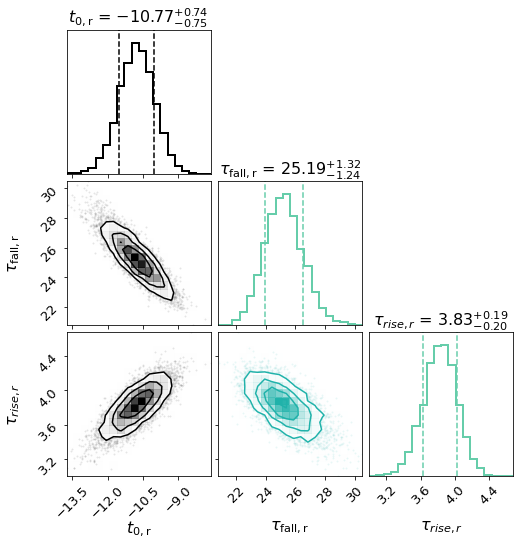

In [10]:
#parameter distribution
ztfp.corner(show=True, which='fit')

### the sn lc fits can be also done with scipy.optimize, which is faster but not that good...

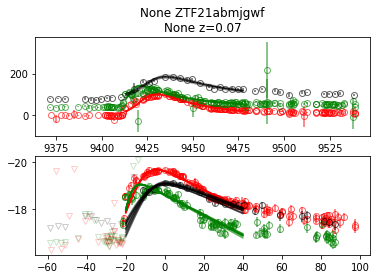

In [11]:
ztfp.run_fit(fit_type=1, 
            fit_routine='trf', 
            fit_bands=['r', 'g', 'i'],
            fit_mean='bazin', 
            fit_fitr=[-50, 50], 
            fit_plotr=[-50, 120], 
            nsteps=100,
            verbose=False
           )
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.plot(gp_type=3, pl_type=3, plot_bands=['r', 'g', 'i'],)

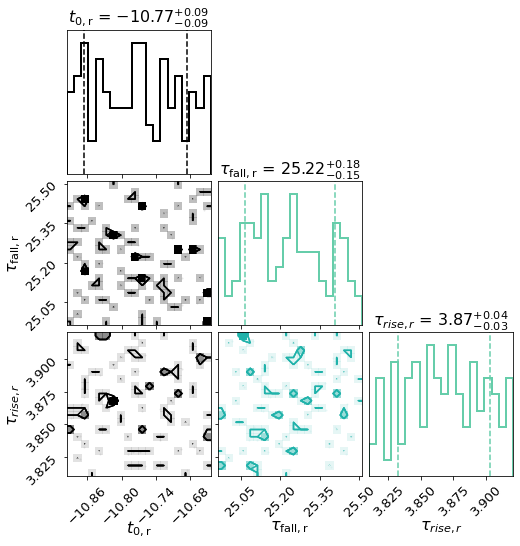

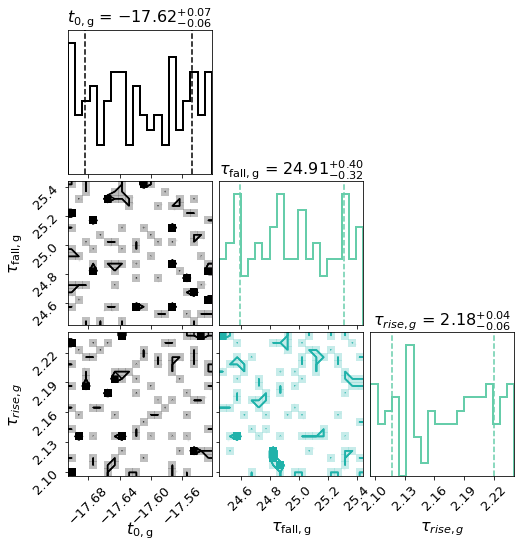

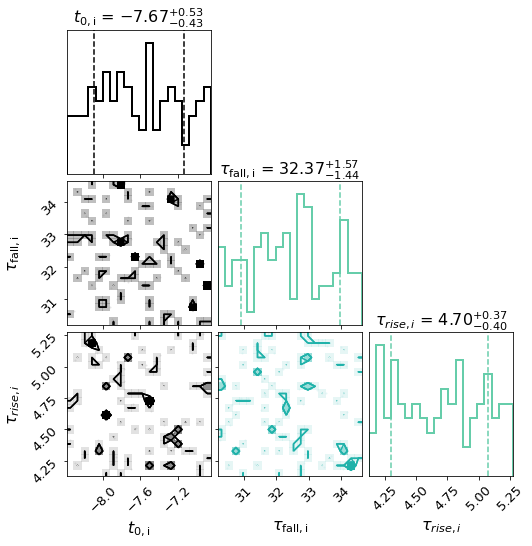

In [12]:
# parameter distribution
ztfp.corner(show=True, which='fit')

### run power law on early phase LCs simultaneously, to decide first light epoch

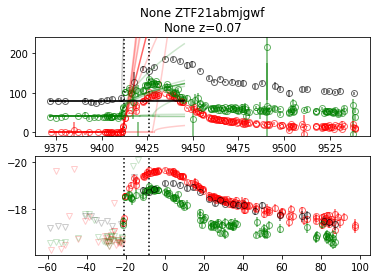

In [13]:
ztfp.explosion_pl(pl_type=1, 
            pl_routine='mcmc', 
            pl_bands=['r', 'g', 'i'],
            nsteps=20000,
            nsteps_burnin=5000,
            nwalkers=100,
            rel_flux_cutoff=.4,
            verbose=False,
           )
fig,(ax, ax2)=plt.subplots(2,1)
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.plot(gp_type=3, fit_type=3, pl_plotmax=10, ax_ylim=[-10,240],
          plot_bands=['r', 'g', 'i'], pl_bands=['r', 'g', 'i'])

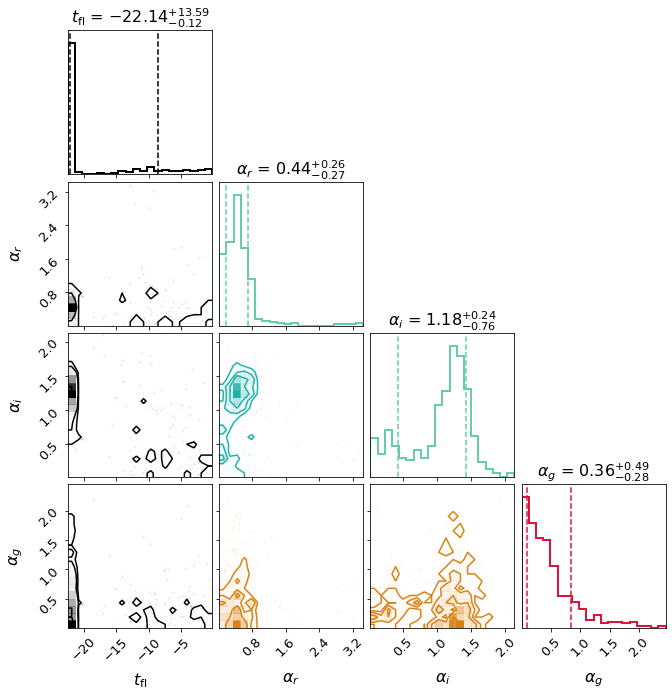

In [14]:
#parameter distribution
ztfp.corner(show=True, which='pl', pl_bands=['r','i','g'])

### make bolometric LCs
#### 1. decide g-r               
#### 2. BC_g from Lyman et al, to Mbol

In [15]:
# 1: colors with both filter available within 24 hours
# 2: epochs with one band available, and the other from fit intepolated
# 3: epochs with one band available, and the other from GP intepolated
ztfp.calc_colors(gmr=[1,], filt1='g', filt2='r', color_thre=24)

In [16]:
# ignore host ebv for Ic BL
ztfp.hostebv = 0
ztfp.sntype = 'SN Ic-BL'

In [17]:
ztfp.lyman_bol() # calculate bolometric LC with g and r, based on Lyman et al 2014

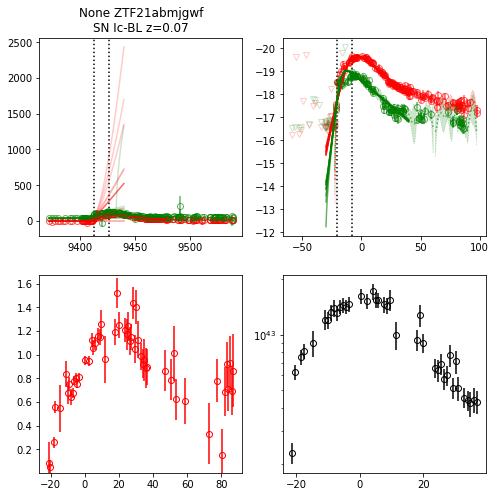

In [18]:
fig,((ax, ax2), (ax3,ax4))=plt.subplots(2,2,figsize=(8,8))
ztfp.ax = ax
ztfp.ax2 = ax2
ztfp.ax3 = ax3
ztfp.ax4 = ax4
ztfp.plot(fit_plotr=[-30, 40], gmr=[1],)

### Arnett fits on Mni and taum in monte carlo mode

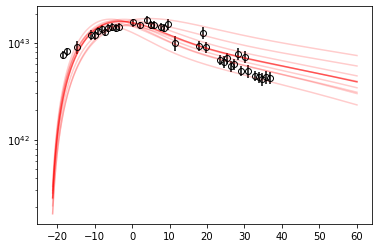

In [19]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=1,
            Arnett_routine='mcmc',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=20000,
            nsteps_burnin=2000,
            verbose=False
           )
fig,ax=plt.subplots(1,1)
ztfp.ax4 = ax
ztfp.plot(gmr=[1])

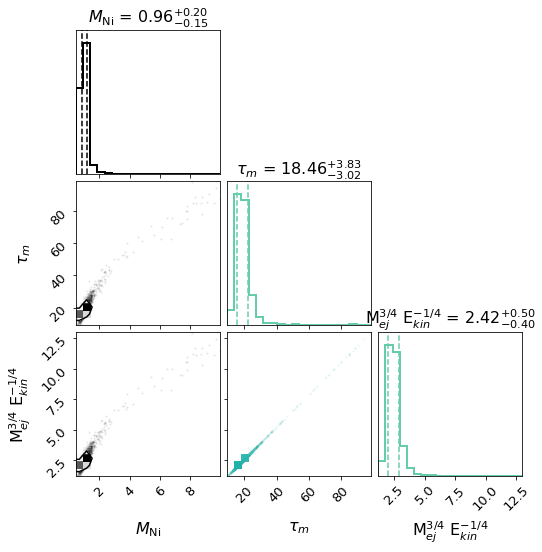

In [20]:
# parameter distribution
ztfp.corner(show=True, which='arnett',)

### Arnett fits on Mni, Ek and Mej with exlosion epoch as free parameter on MC mode

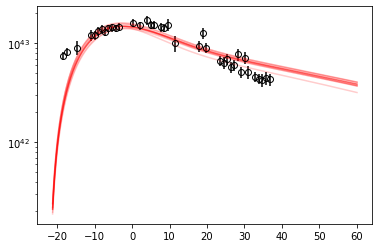

In [25]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=3,
            Arnett_routine='mcmc',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=200,
            verbose=False
           )
fig,ax=plt.subplots(1,1)
ztfp.ax4 = ax
ztfp.plot(gmr=[1])

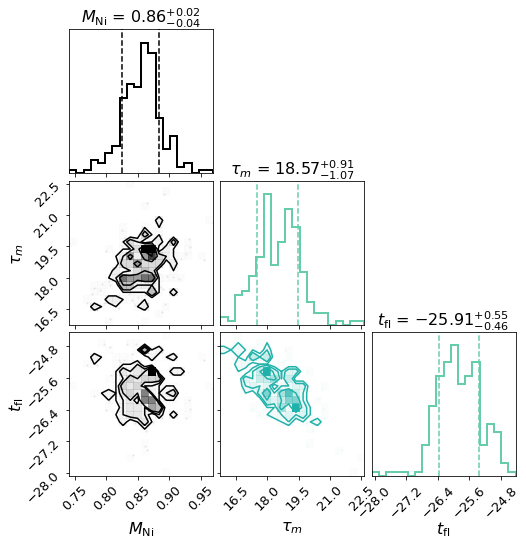

In [26]:
# parameter distribution
ztfp.corner(show=True, which='arnett_fitt',)

### Arnett fits on Mni, Ek and Mej with exlosion epoch as free parameter with scipy

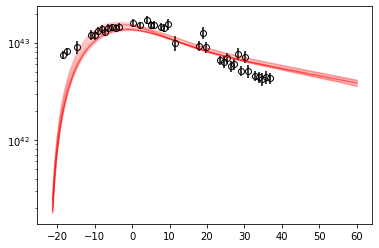

In [27]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=3,
            Arnett_routine='trf',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=200,
            verbose=False
           )
fig,ax=plt.subplots(1,1)
ztfp.ax4 = ax
ztfp.plot(gmr=[1])

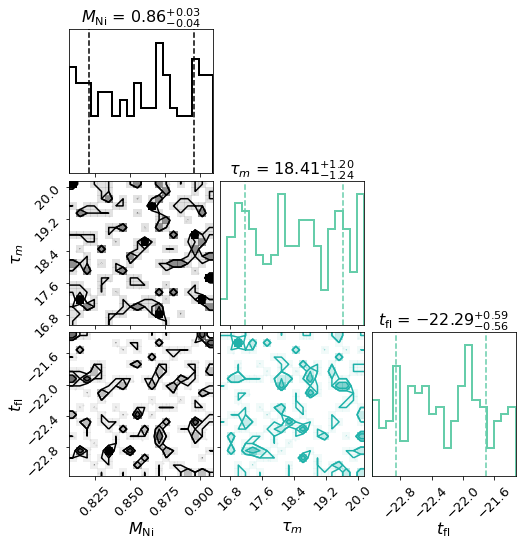

In [28]:
# parameter distribution
ztfp.corner(show=True, which='arnett_fitt',)

### Arnett fits on Mni and taum with scipy

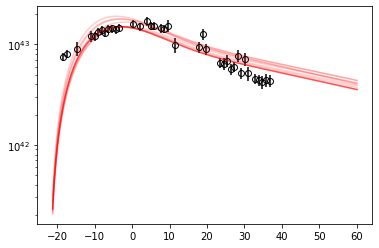

In [29]:
ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=1,
            Arnett_routine='trf',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=1000,
            verbose=False
           )
fig,ax=plt.subplots(1,1)
ztfp.ax4 = ax
ztfp.plot(gmr=[1])

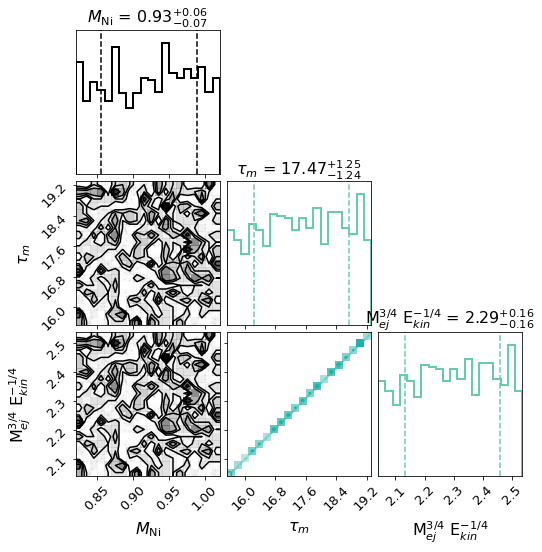

In [30]:
# parameter distribution
ztfp.corner(show=True, which='arnett',)

# for all object

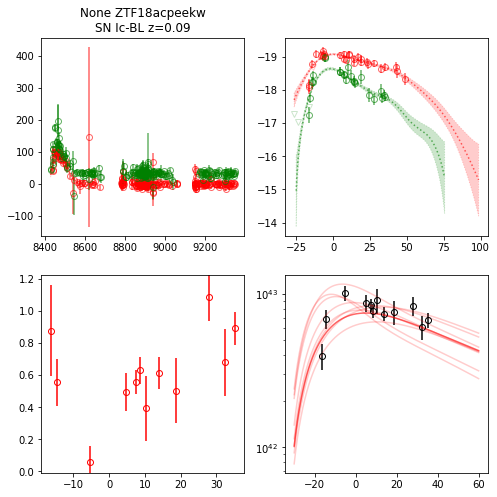

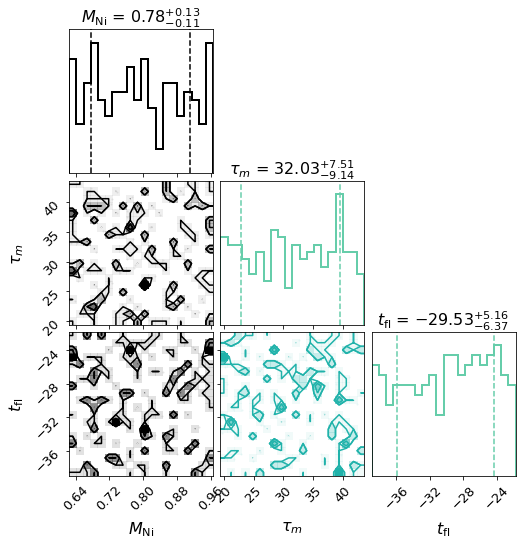

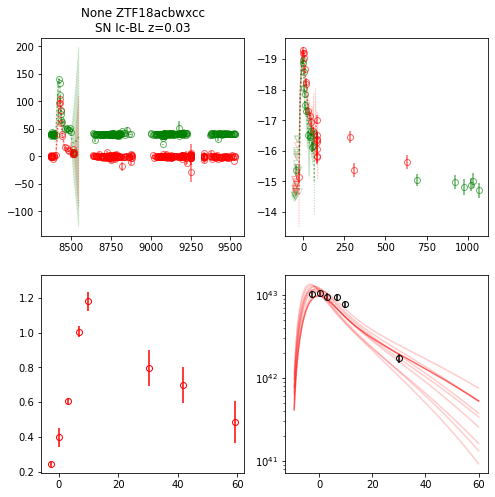

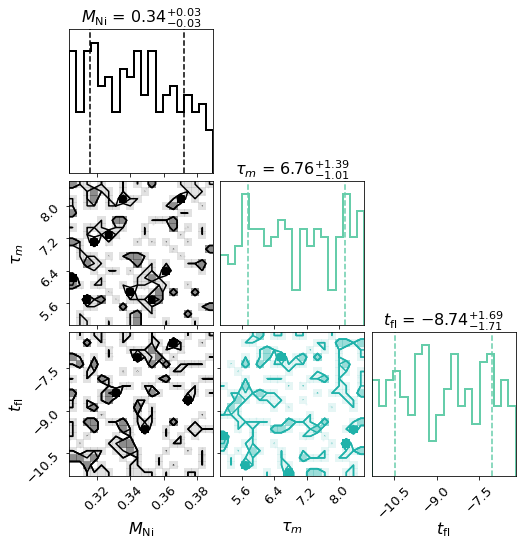

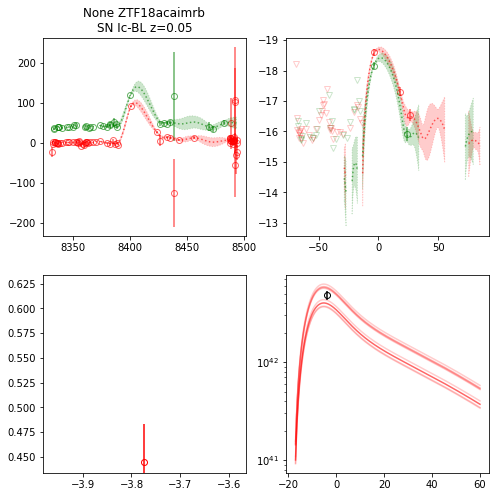

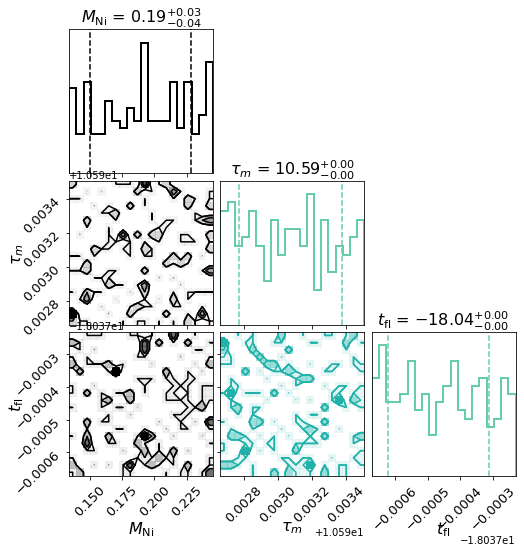

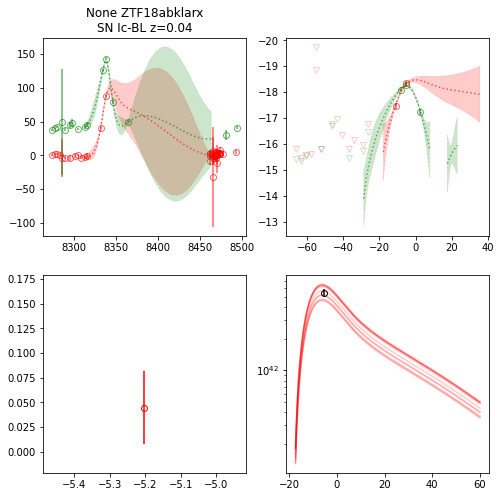

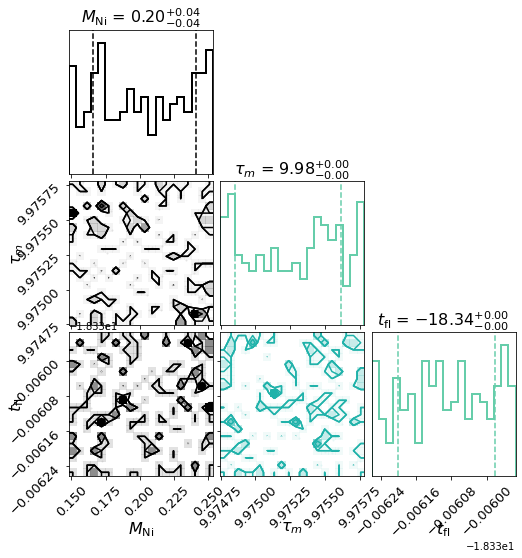

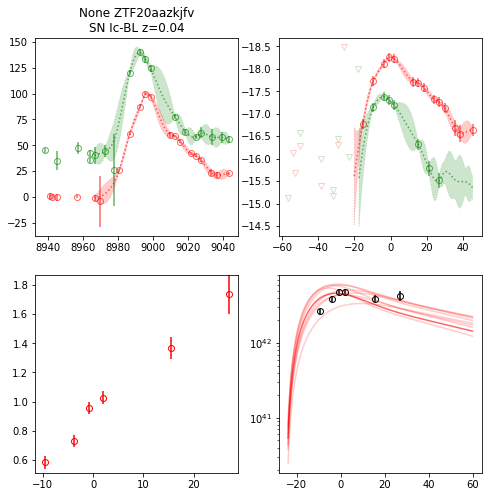

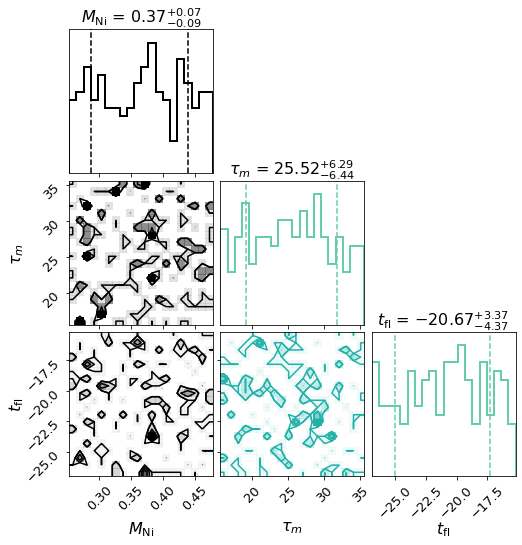

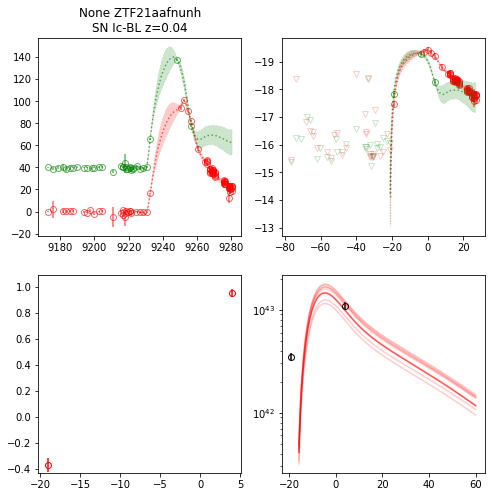

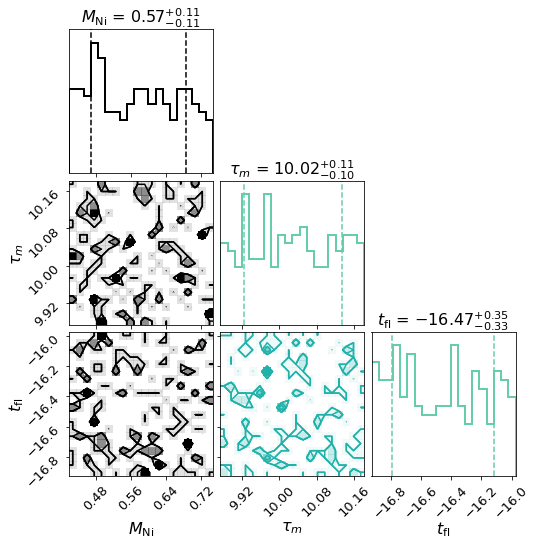

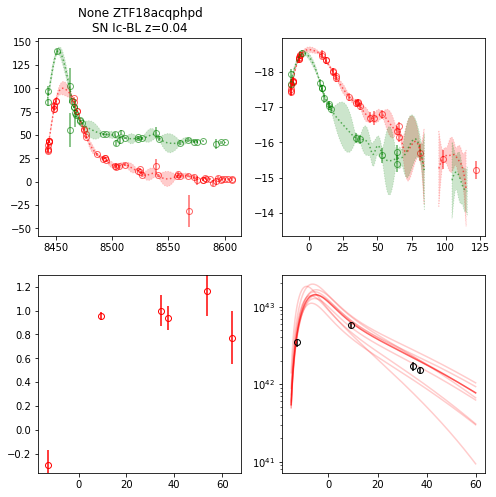

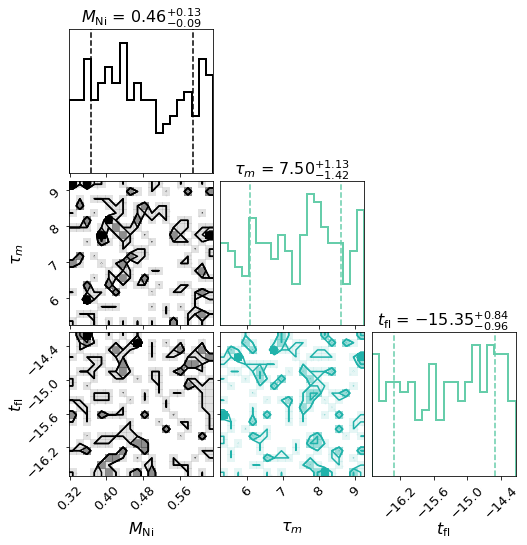

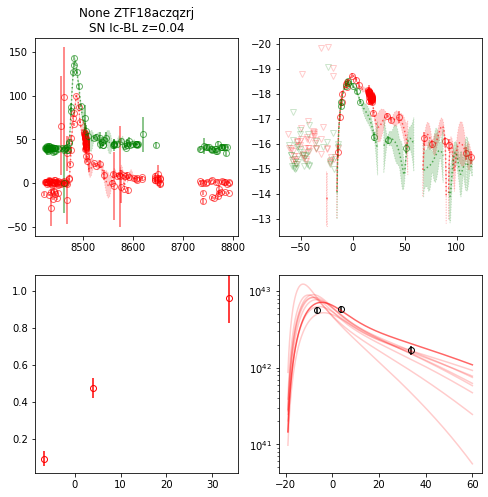

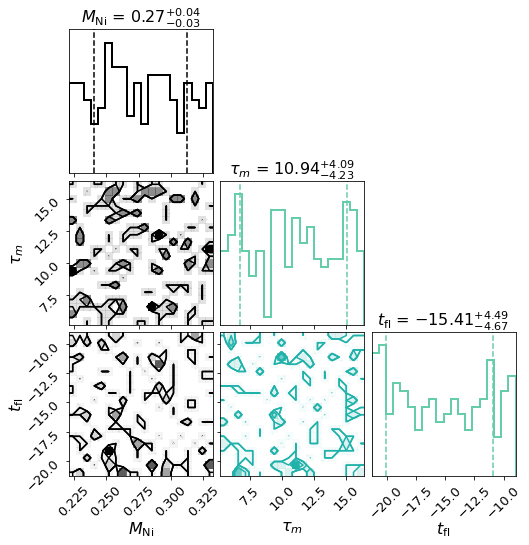

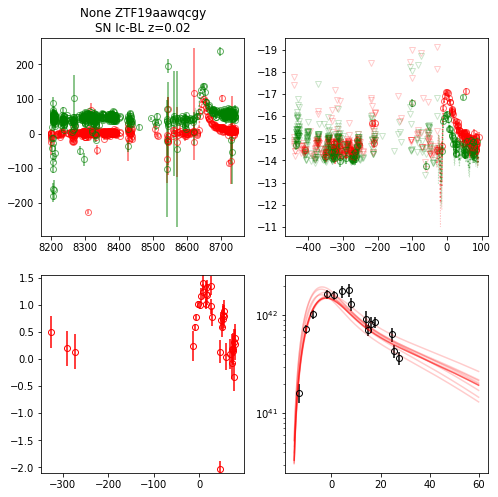

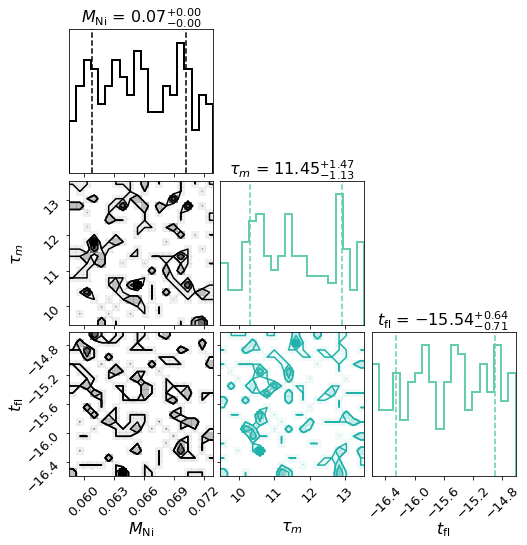

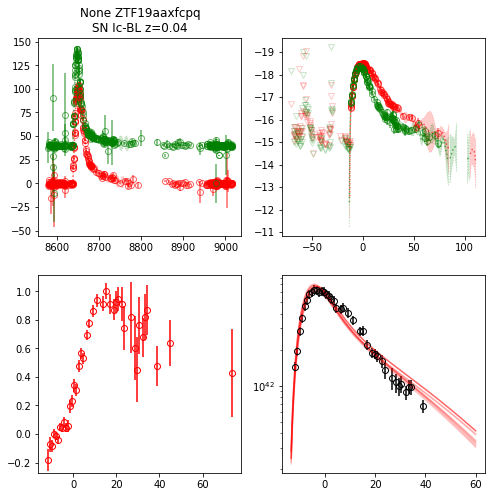

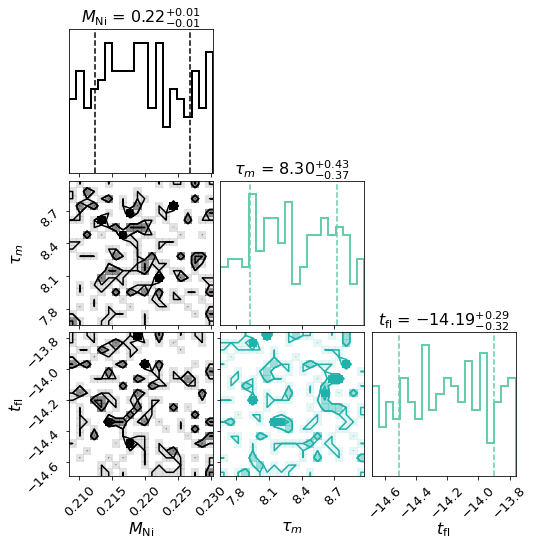

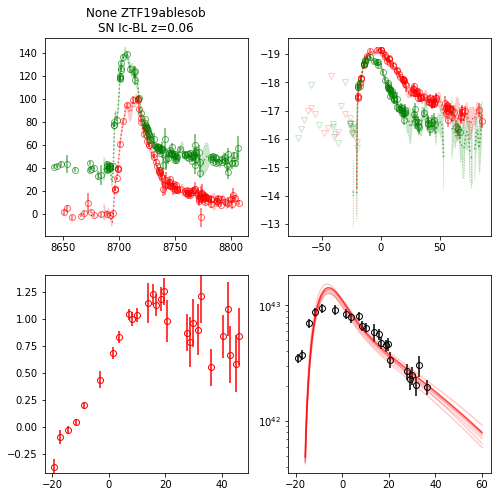

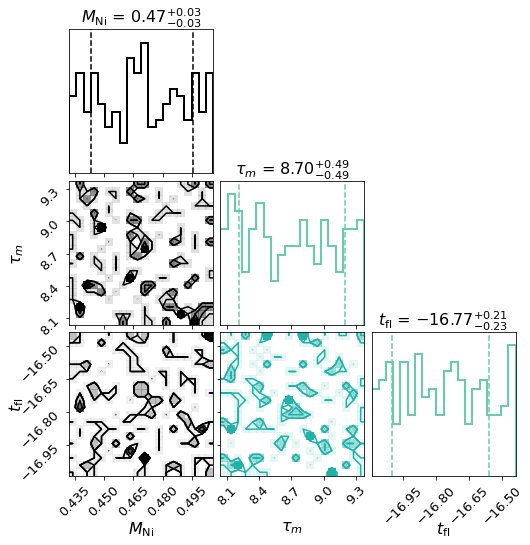

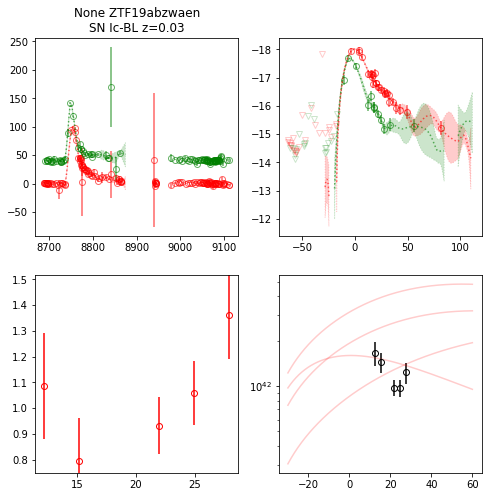

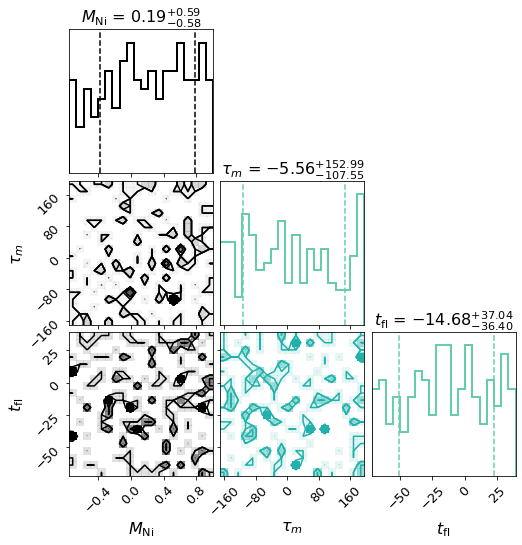

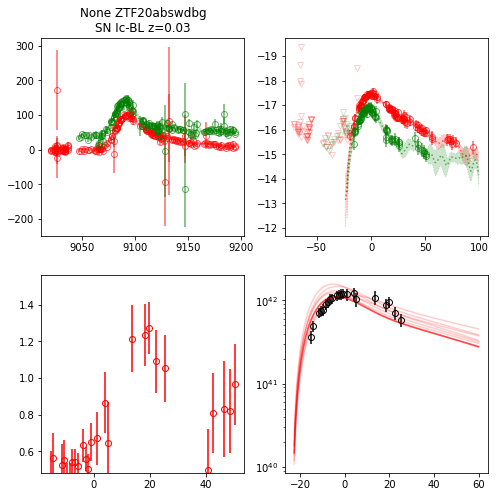

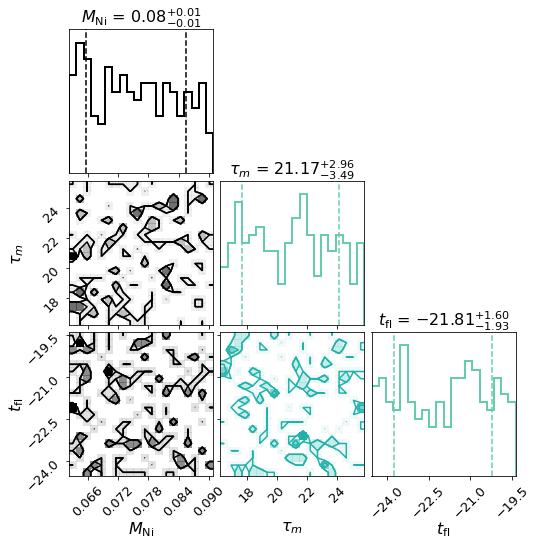

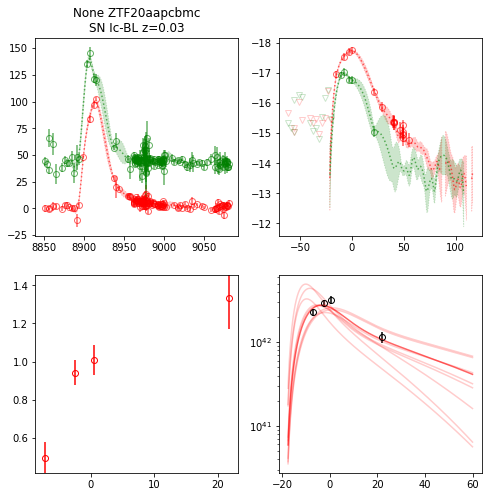

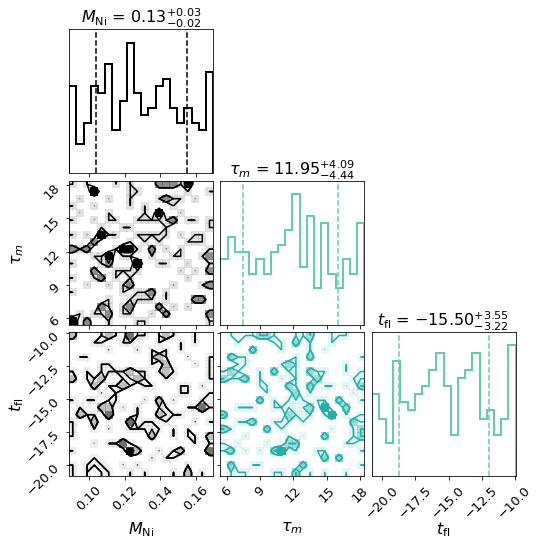

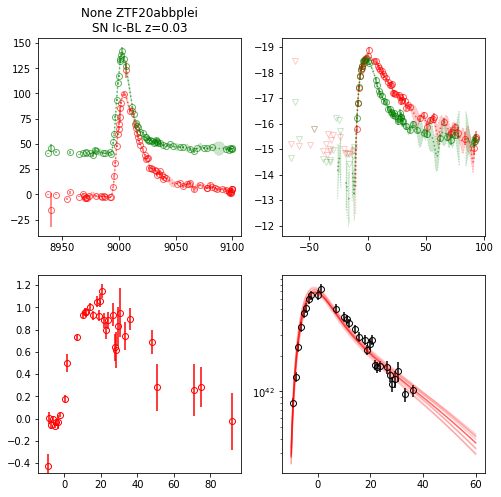

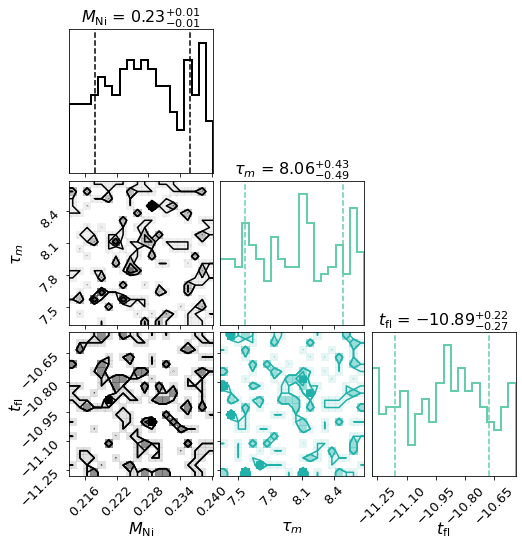

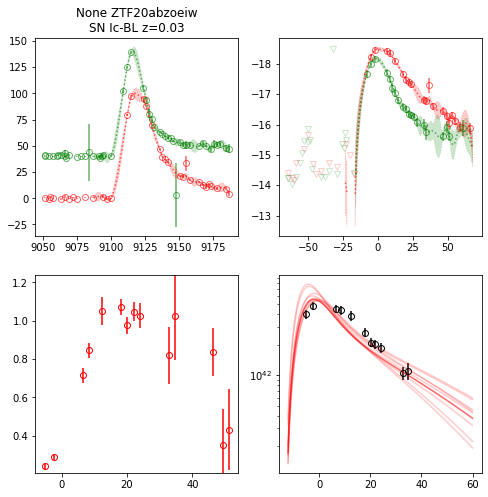

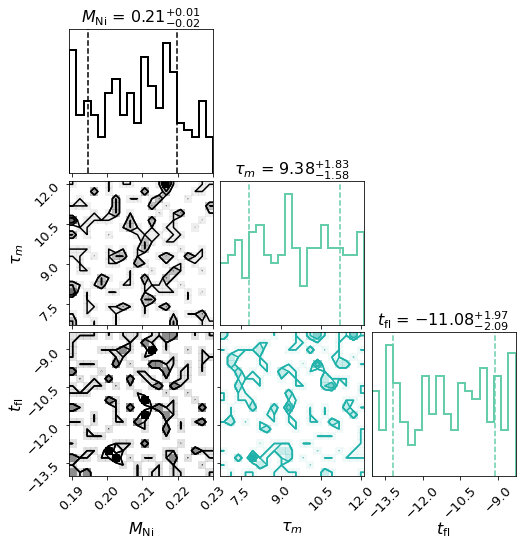

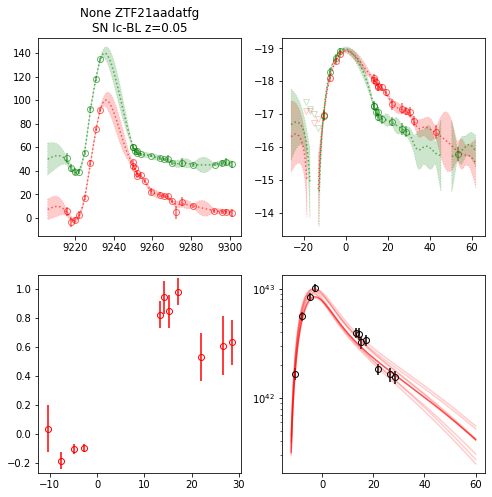

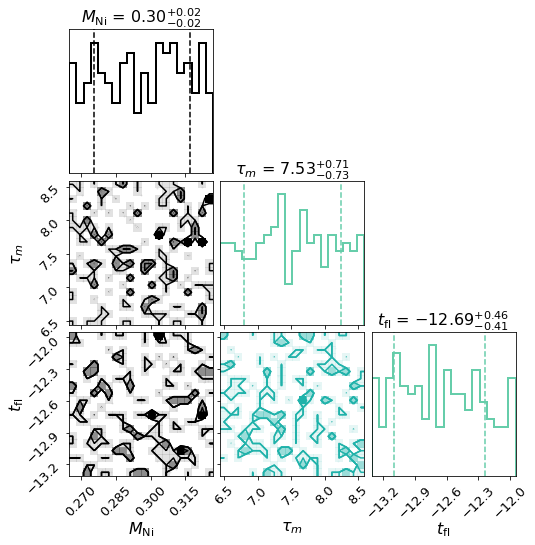

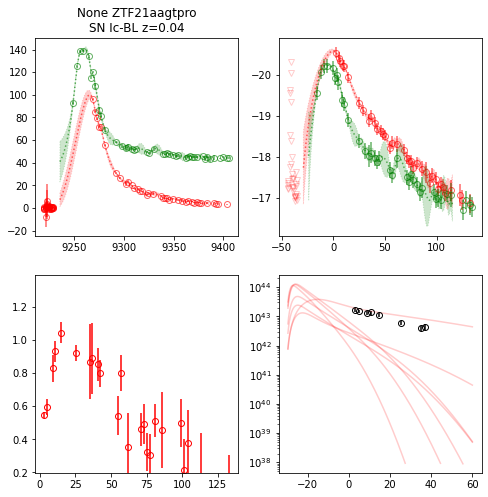

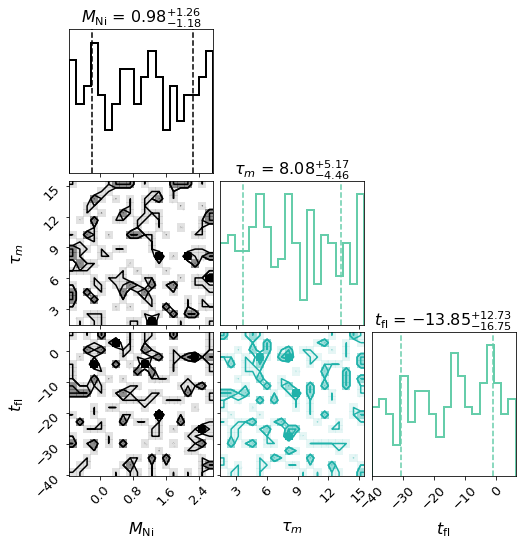

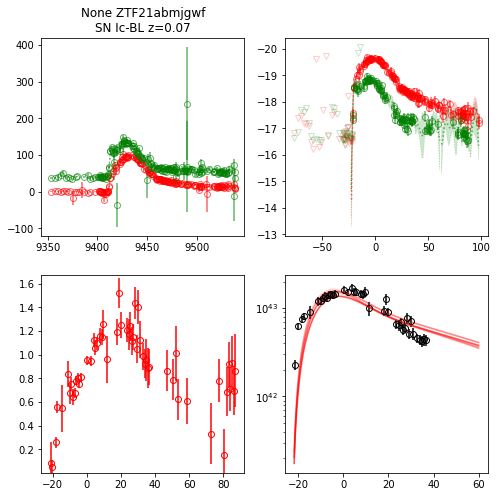

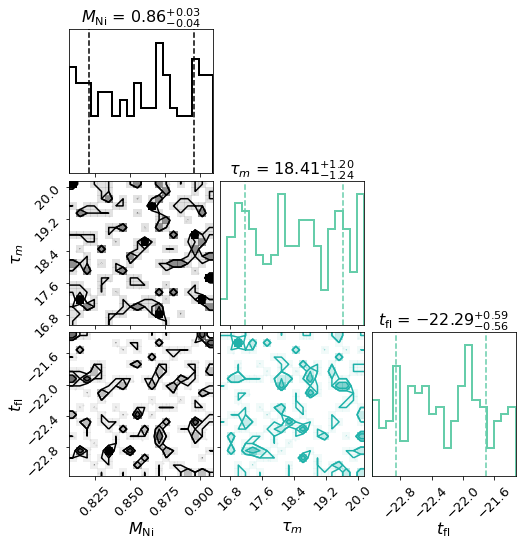

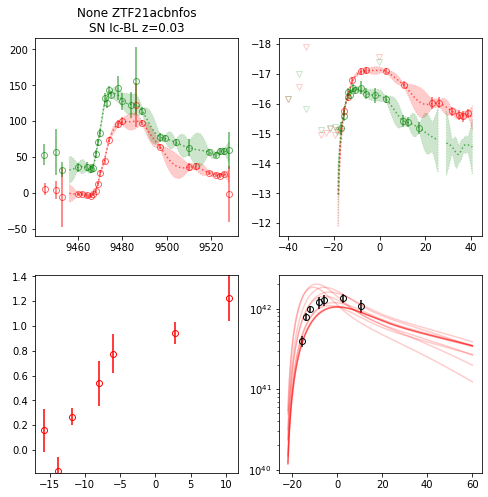

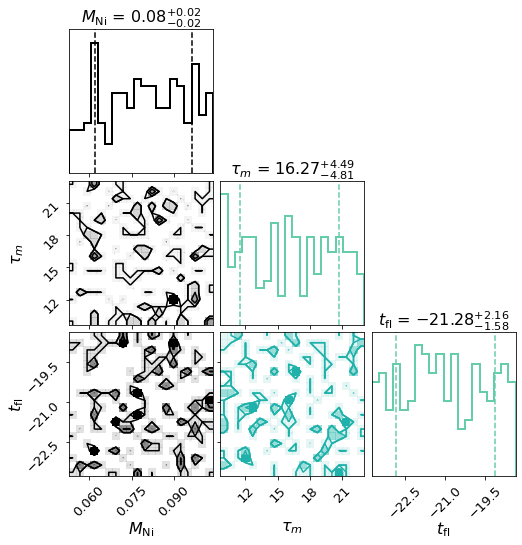

In [19]:
for n, ztfid in enumerate(snlist1):
    #if n > 3:continue
    #print (ztfid)
    ztfp = ztfsingle(ztfid=ztfid, z=ztfpm.meta['redshift'][ztfid], 
                 dm=ztfpm.meta['dm'][ztfid], mkwebv=ztfpm.meta['ebv'][ztfid],)
    ztfp.get_local_forced_lightcurves()
    ztfp.add_flux()
    ztfp.run_gp(gp_type=1, 
            gp_routine='minimize', 
            gp_mean='bazin', 
            kernel='matern32', 
            fix_scale=True,
            gp_fitr=[-60, 120], 
            gp_plotr=[-30, 120], 
            gp_bands=['g','r',]
           )
    ztfp.set_t0_withgp(filt='r')
    ztfp.calc_colors(gmr=[1,], filt1='g', filt2='r', color_thre=24)
    ztfp.hostebv = 0
    ztfp.sntype = 'SN Ic-BL'
    ztfp.lyman_bol()
    
    ztfp.arnett_fit(Arnett_type=1, 
            Arnett_style=3,
            Arnett_routine='trf',  
            Arnett_fitr=[-30, 40], 
            fit_plotr=[-50, 120], 
            nsteps=200,
            verbose=False
           )

    fig,((ax, ax2), (ax3,ax4))=plt.subplots(2,2,figsize=(8,8))
    ztfp.ax = ax
    ztfp.ax2 = ax2
    ztfp.ax3 = ax3
    ztfp.ax4 = ax4
    ztfp.plot(fit_plotr=[-30, 40], gmr=[1],)
    
    ztfp.corner(show=True, which='arnett_fitt',)
    #break